# Figure 5 Codes

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import os
import sys
current_path = os.getcwd()
parent_directory = os.path.dirname(current_path)
sys.path.append(parent_directory)  # Adds the parent directory to the Python path
from Class.jenie import Jenie
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Figure A

Representative transcriptional UMAP and spatial map projection obtained of 1 year old control (upper) and 2 weeks post PTBP1-ASOs injected mice (lower) highlighting the clusters: Medial Ependymal (blue), Lateral Ependymal (red), SVZ-Stage 1 (green), SVZ-Stage 2 (light green), SVZ-Stage 3 (purple).

### Ingest control sample to svz neurogenesis pathway

In [6]:
# svz reference path for ingestion (from 4 weeks old data)
ref = sc.read("../DataF/fig5/final_reference_4week_svz.h5ad")


In [7]:
# control dataset
noninj2 = sc.read("../DataF/fig5/adatasvz_neuro_noastro_non_injected_3_2_iset1.h5ad")

In [8]:
# ingest control data to svz reference
d = noninj2

vars1 = list(d.var.index)
vars2 = list(ref.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = ref[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='neurogenesis_pathway')



Genes in common: 275
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/kjenie/DataspellProjects/

### Plot svz neurogensis pathway of ingested control data

In [9]:
neu_groups =         ["GABAergic striatum neurons",
        "Lateral ependymal",
        "Medial ependymal",
        "Stage 1",
        "Stage 2",
        "Stage 3",
        "SVZ oligos",]


In [10]:
noninj2j = Jenie(d, "noninj2ingested", "noninj2ingested", "neurogenesis_pathway")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


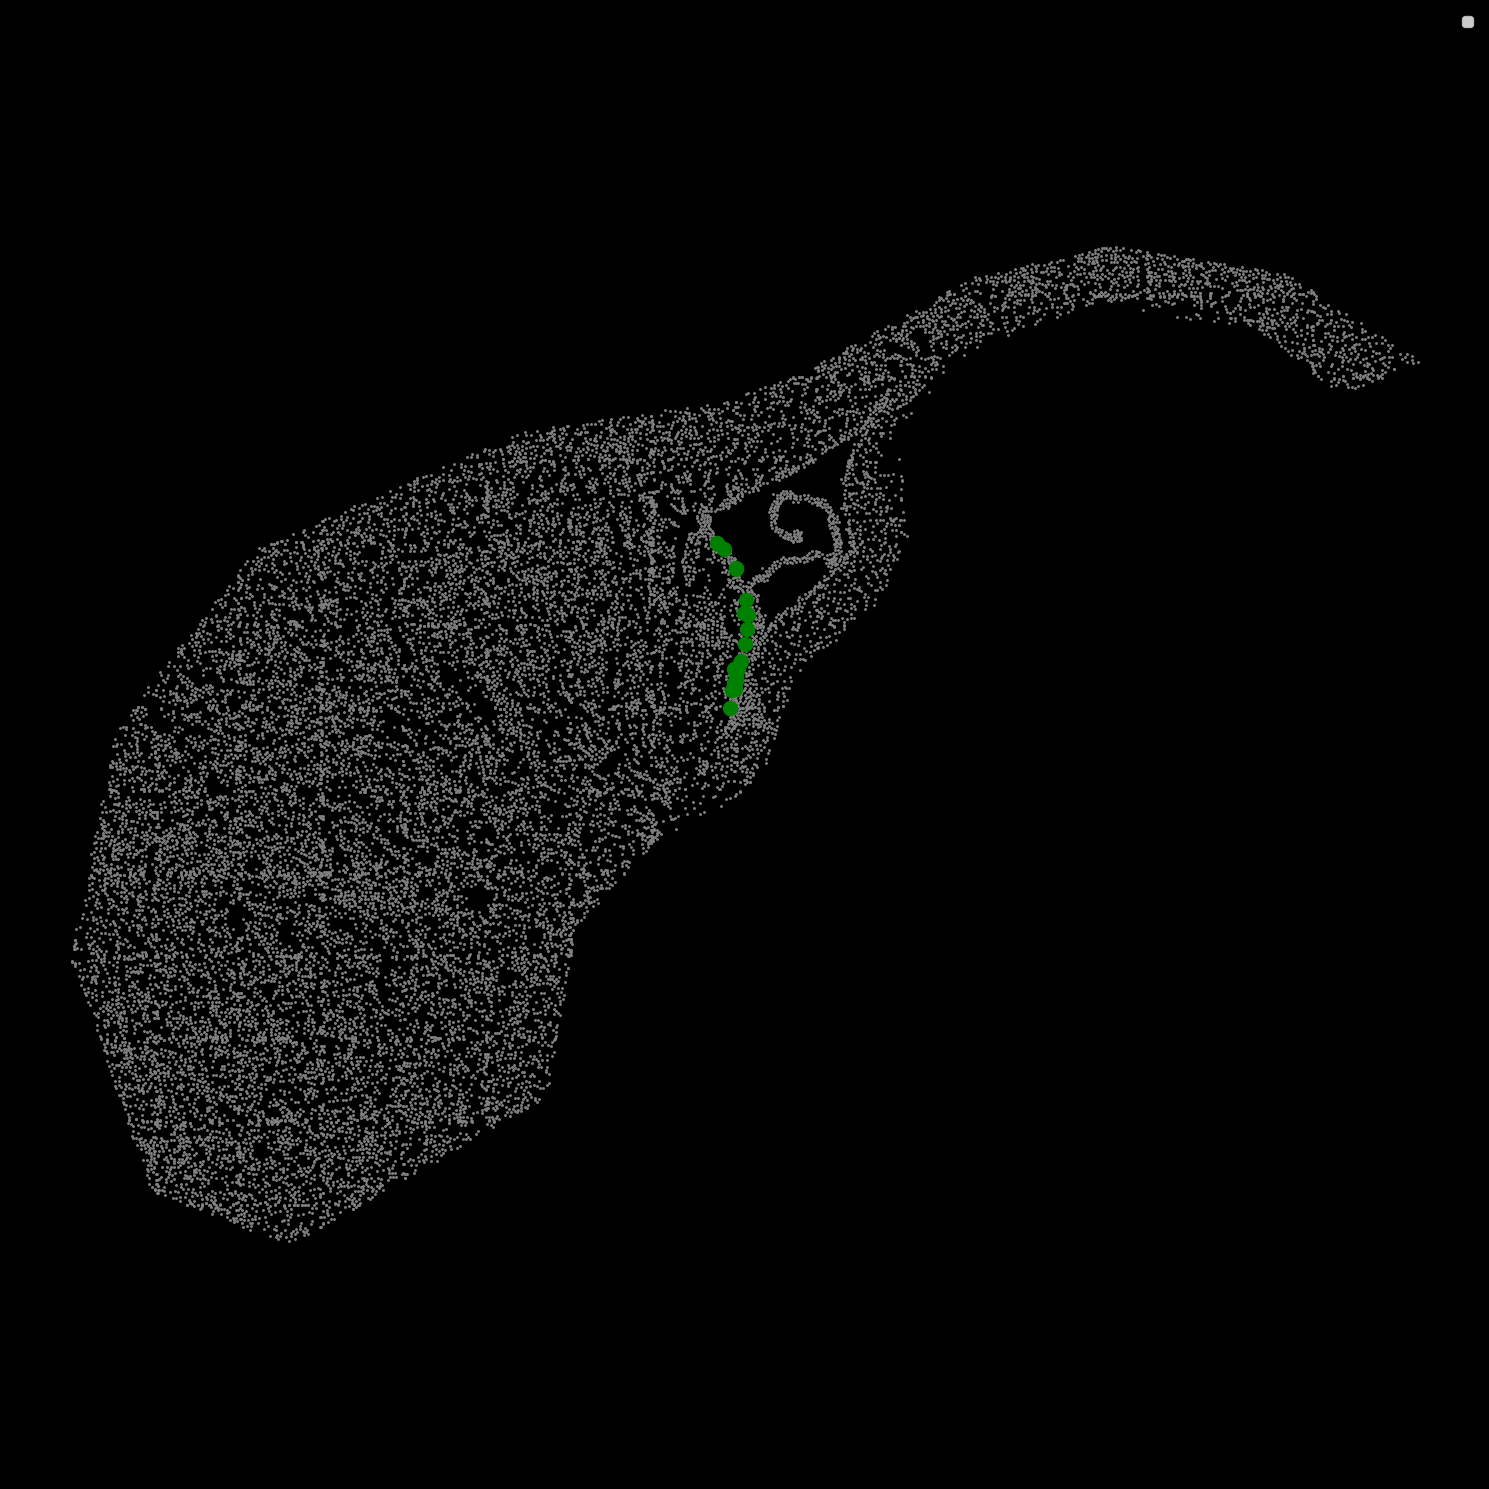

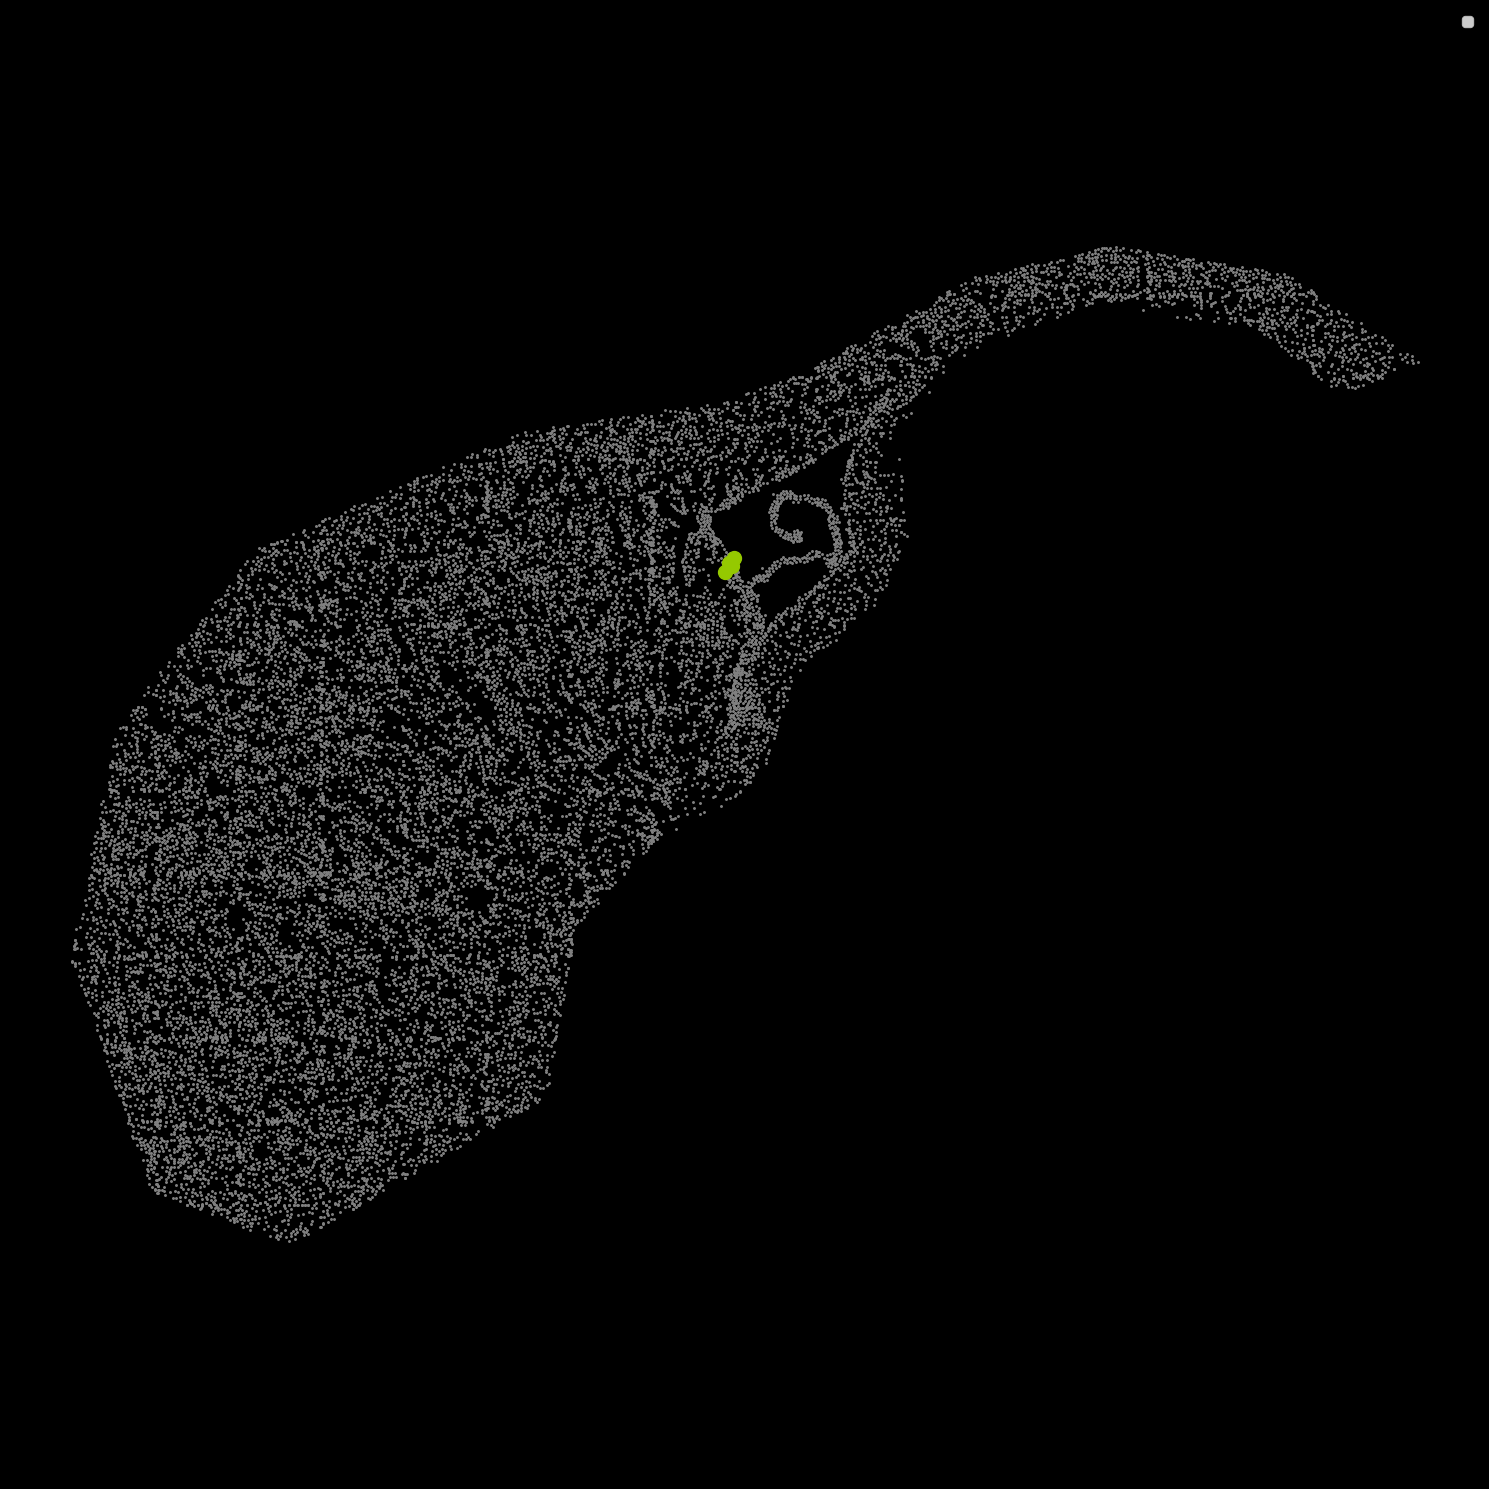

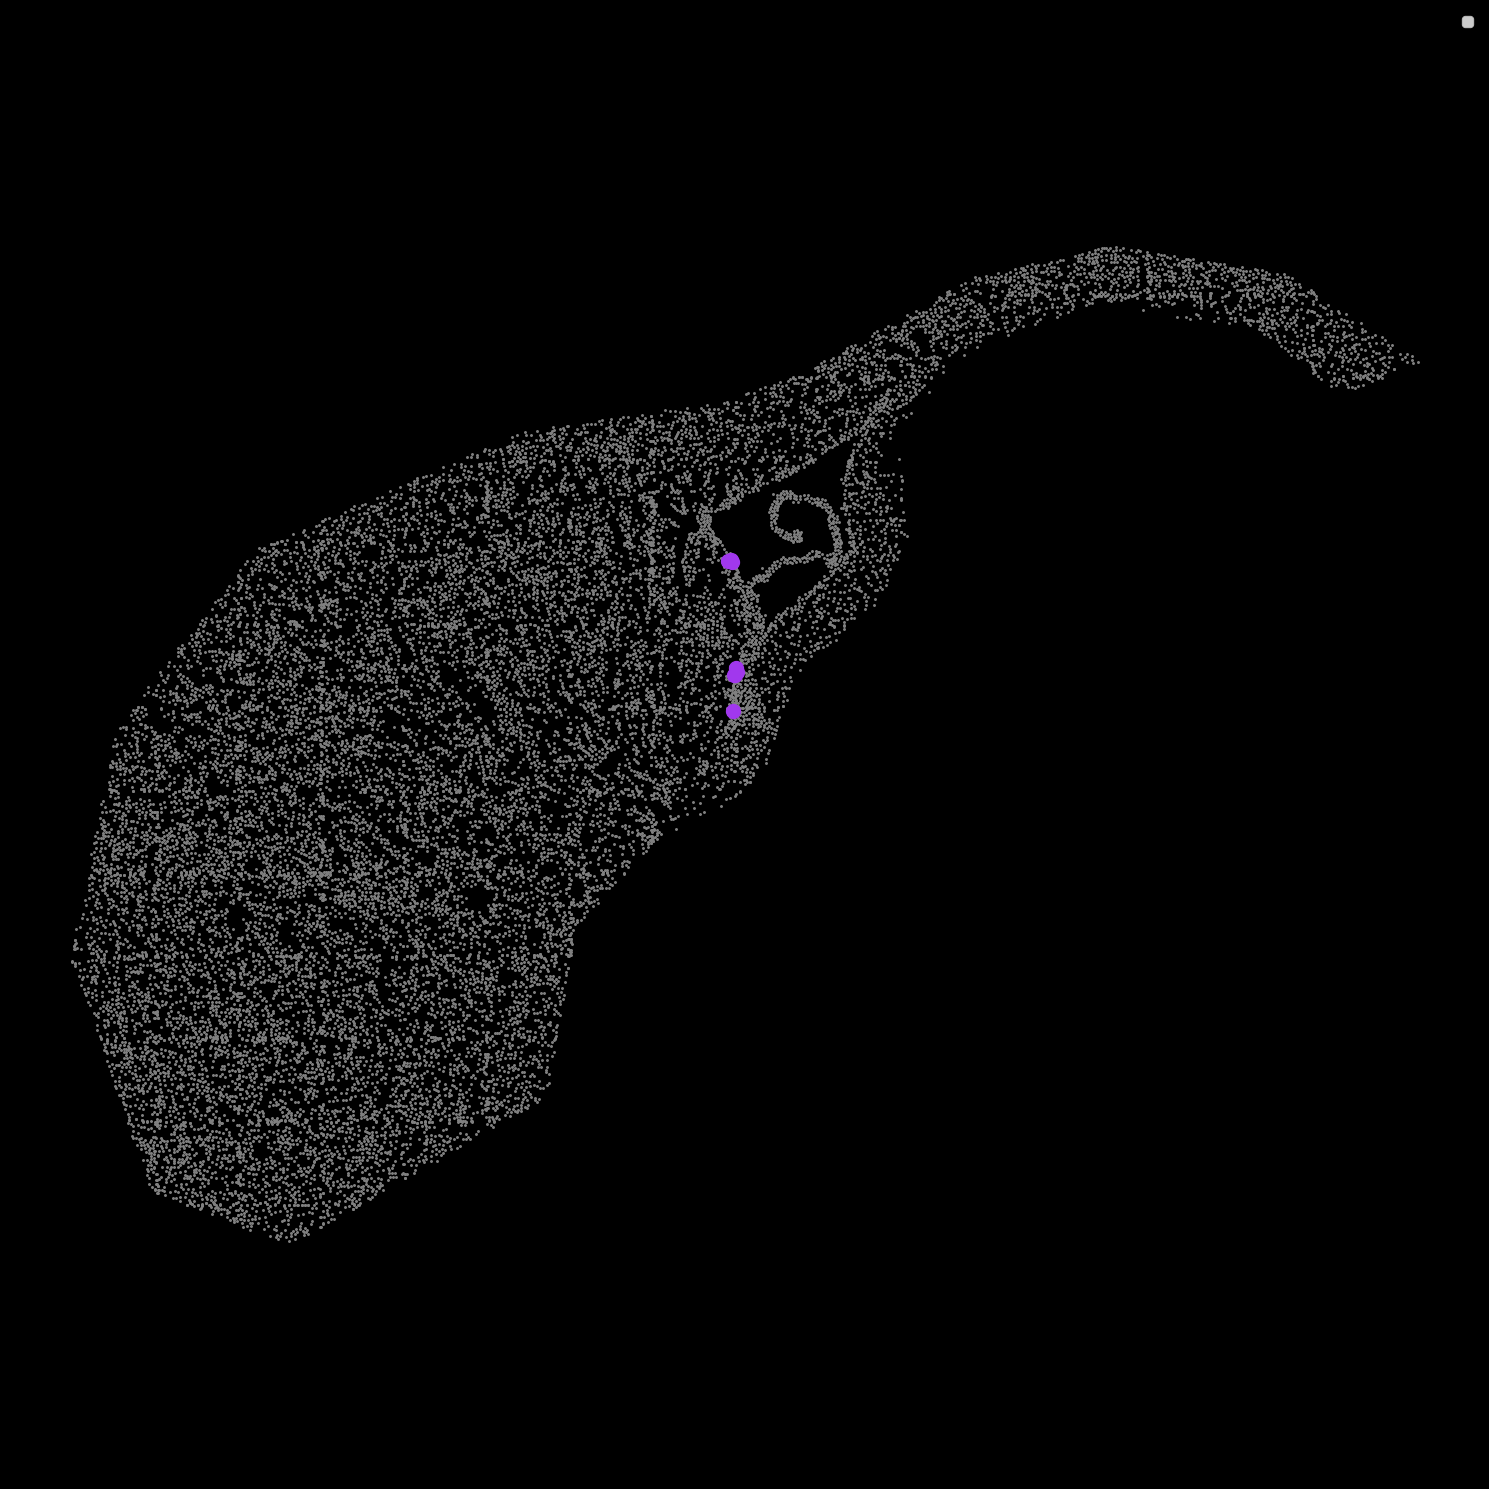

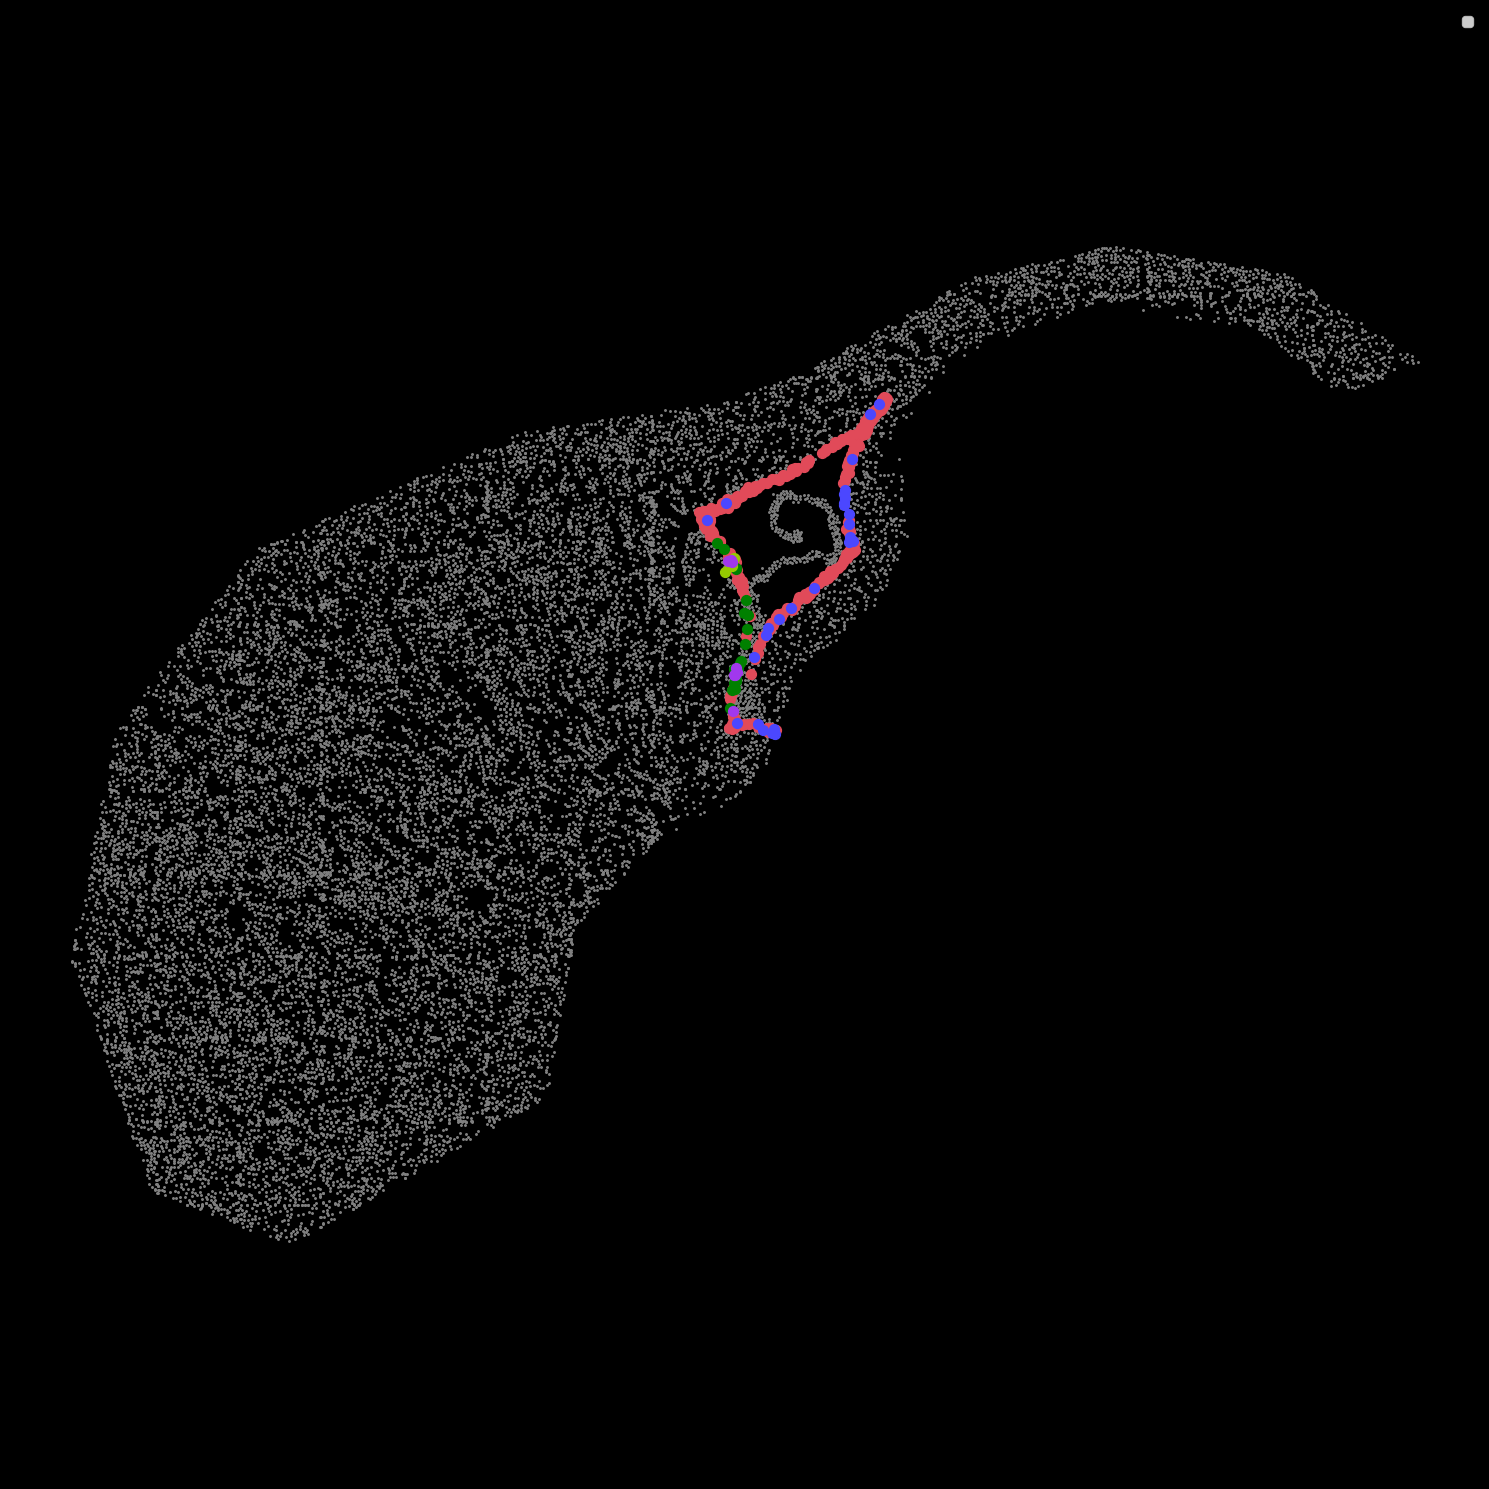

In [11]:
# plot the stages
noninj2j.plot_cluster_scdata("neurogenesis_pathway", clusters=[neu_groups[3]], ref=noninj2, sbig=400)
noninj2j.plot_cluster_scdata("neurogenesis_pathway", clusters=[neu_groups[4]], ref=noninj2, sbig=400)
noninj2j.plot_cluster_scdata("neurogenesis_pathway", clusters=[neu_groups[5]], ref=noninj2, sbig=400)
noninj2j.plot_cluster_scdata("neurogenesis_pathway", clusters=neu_groups[1:-1], ref=noninj2, sbig=200)

/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


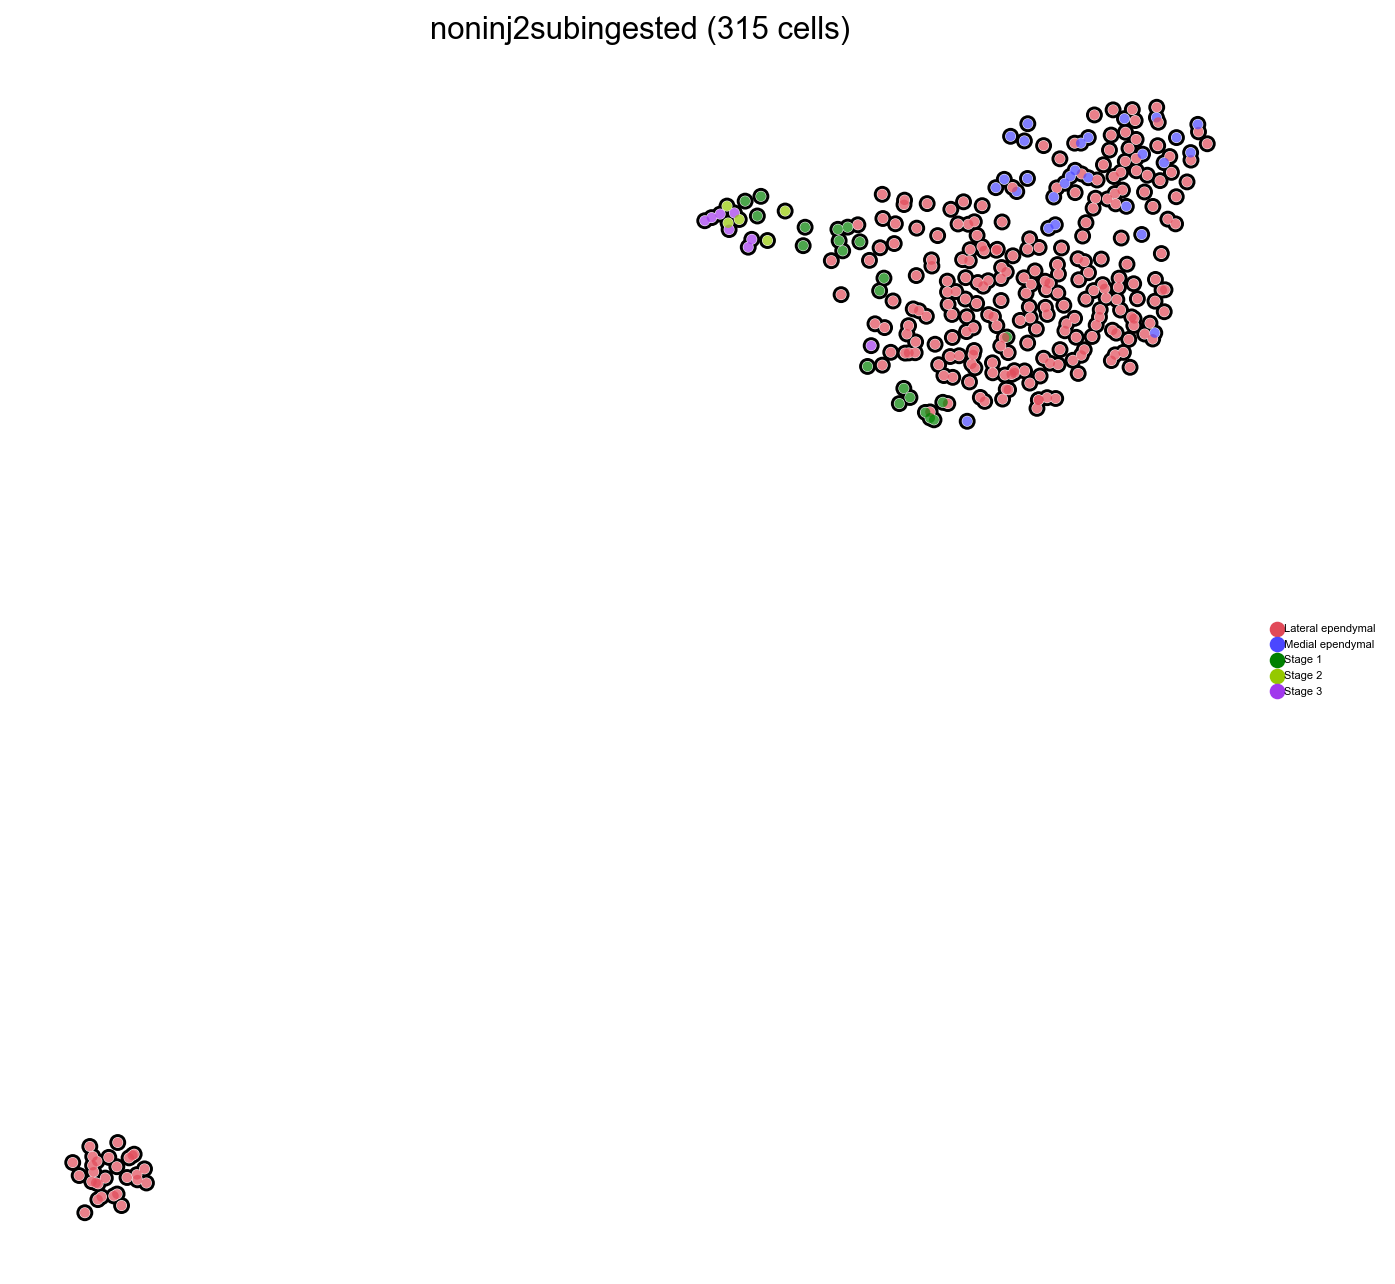

In [12]:
# reumap the subset of the svz pathway

noinj2sub = noninj2j.get_cluster(neu_groups[1:-1], "neurogenesis_pathway")
noninj2subj = Jenie(noinj2sub, "noninj2subingested", "noninj2subingested", "neurogenesis_pathway")
noninj2subj.reprocess()
noninj2subj.umap("neurogenesis_pathway", fig=(10,10), size=80, legend="right margin")

### Ingest treatment sample to svz neurogenesis pathway

In [26]:
# read ptb data
ptb22 = sc.read("../DataF/fig5/adatasvz_neuro_noastro_ptb_injected_4_18_iset2.h5ad")

In [14]:
# ingest to svz reference
d = ptb22

vars1 = list(d.var.index)
vars2 = list(ref.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = ref[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='neurogenesis_pathway')



Genes in common: 275
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


### Plot svz neurogenesis pathway of ingested treatment data

In [15]:
ptb22j = Jenie(d, "ptb22ingested", "ptb22ingested", "neurogenesis_pathway")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


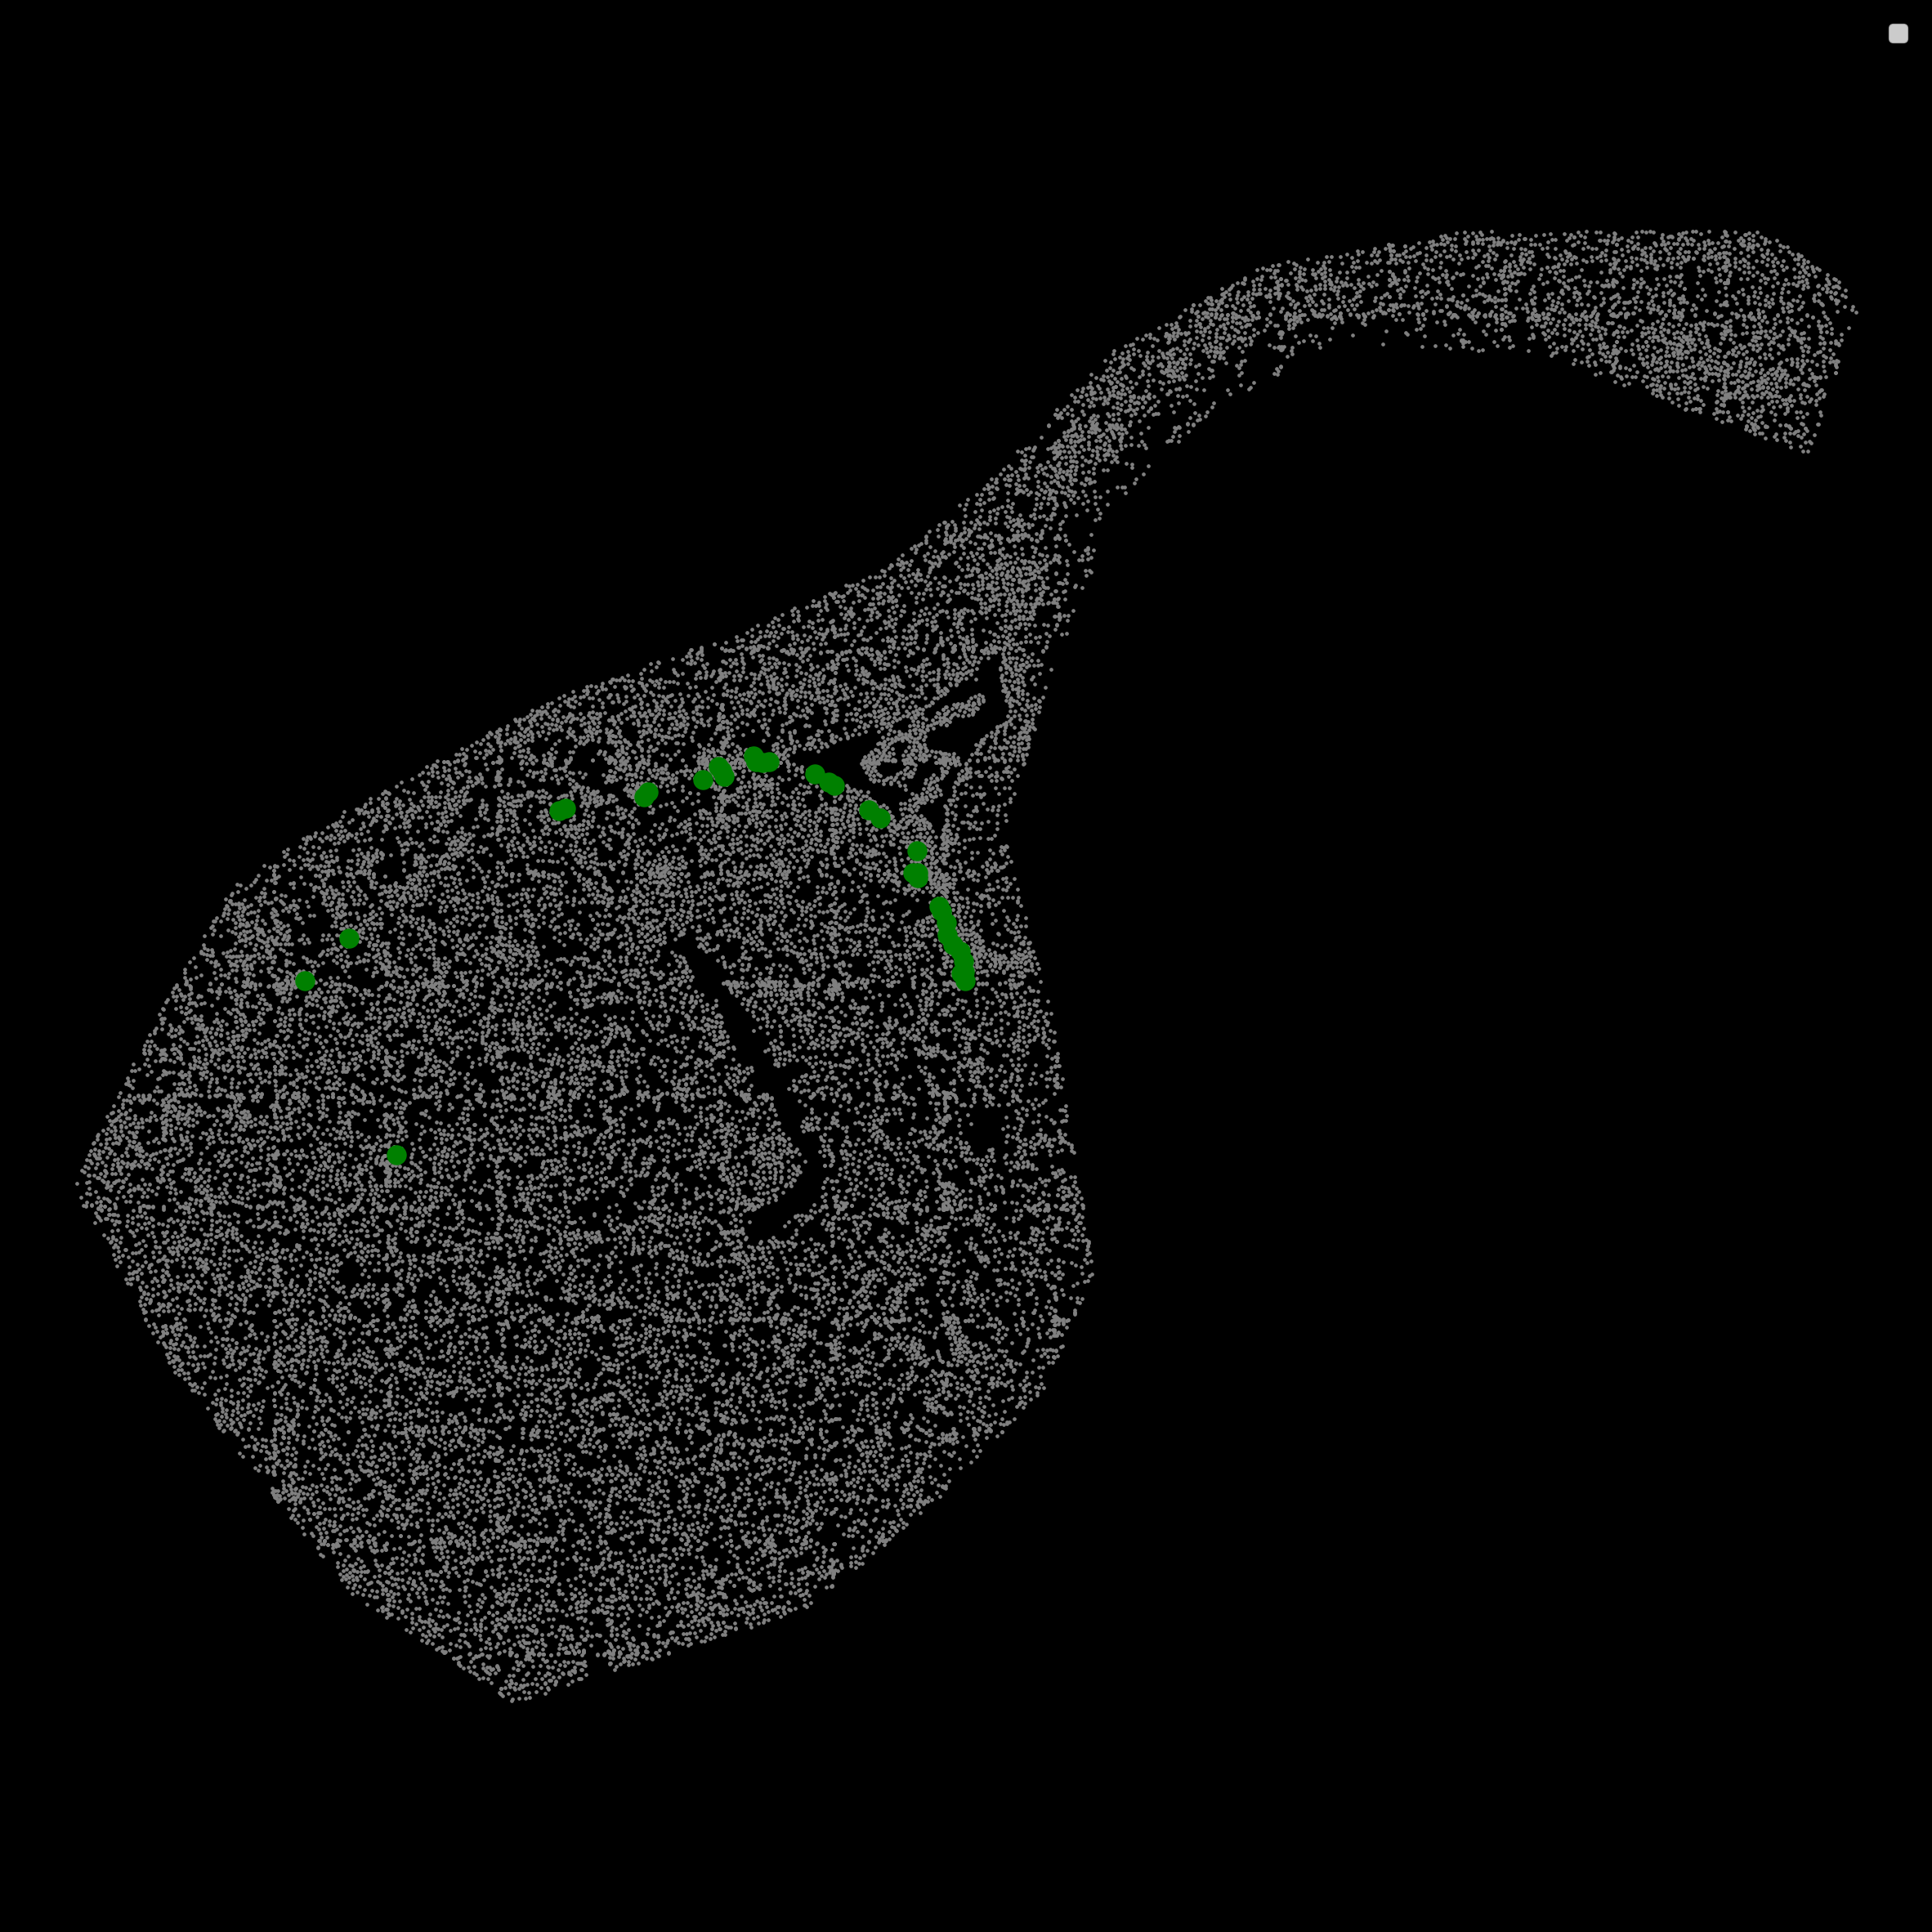

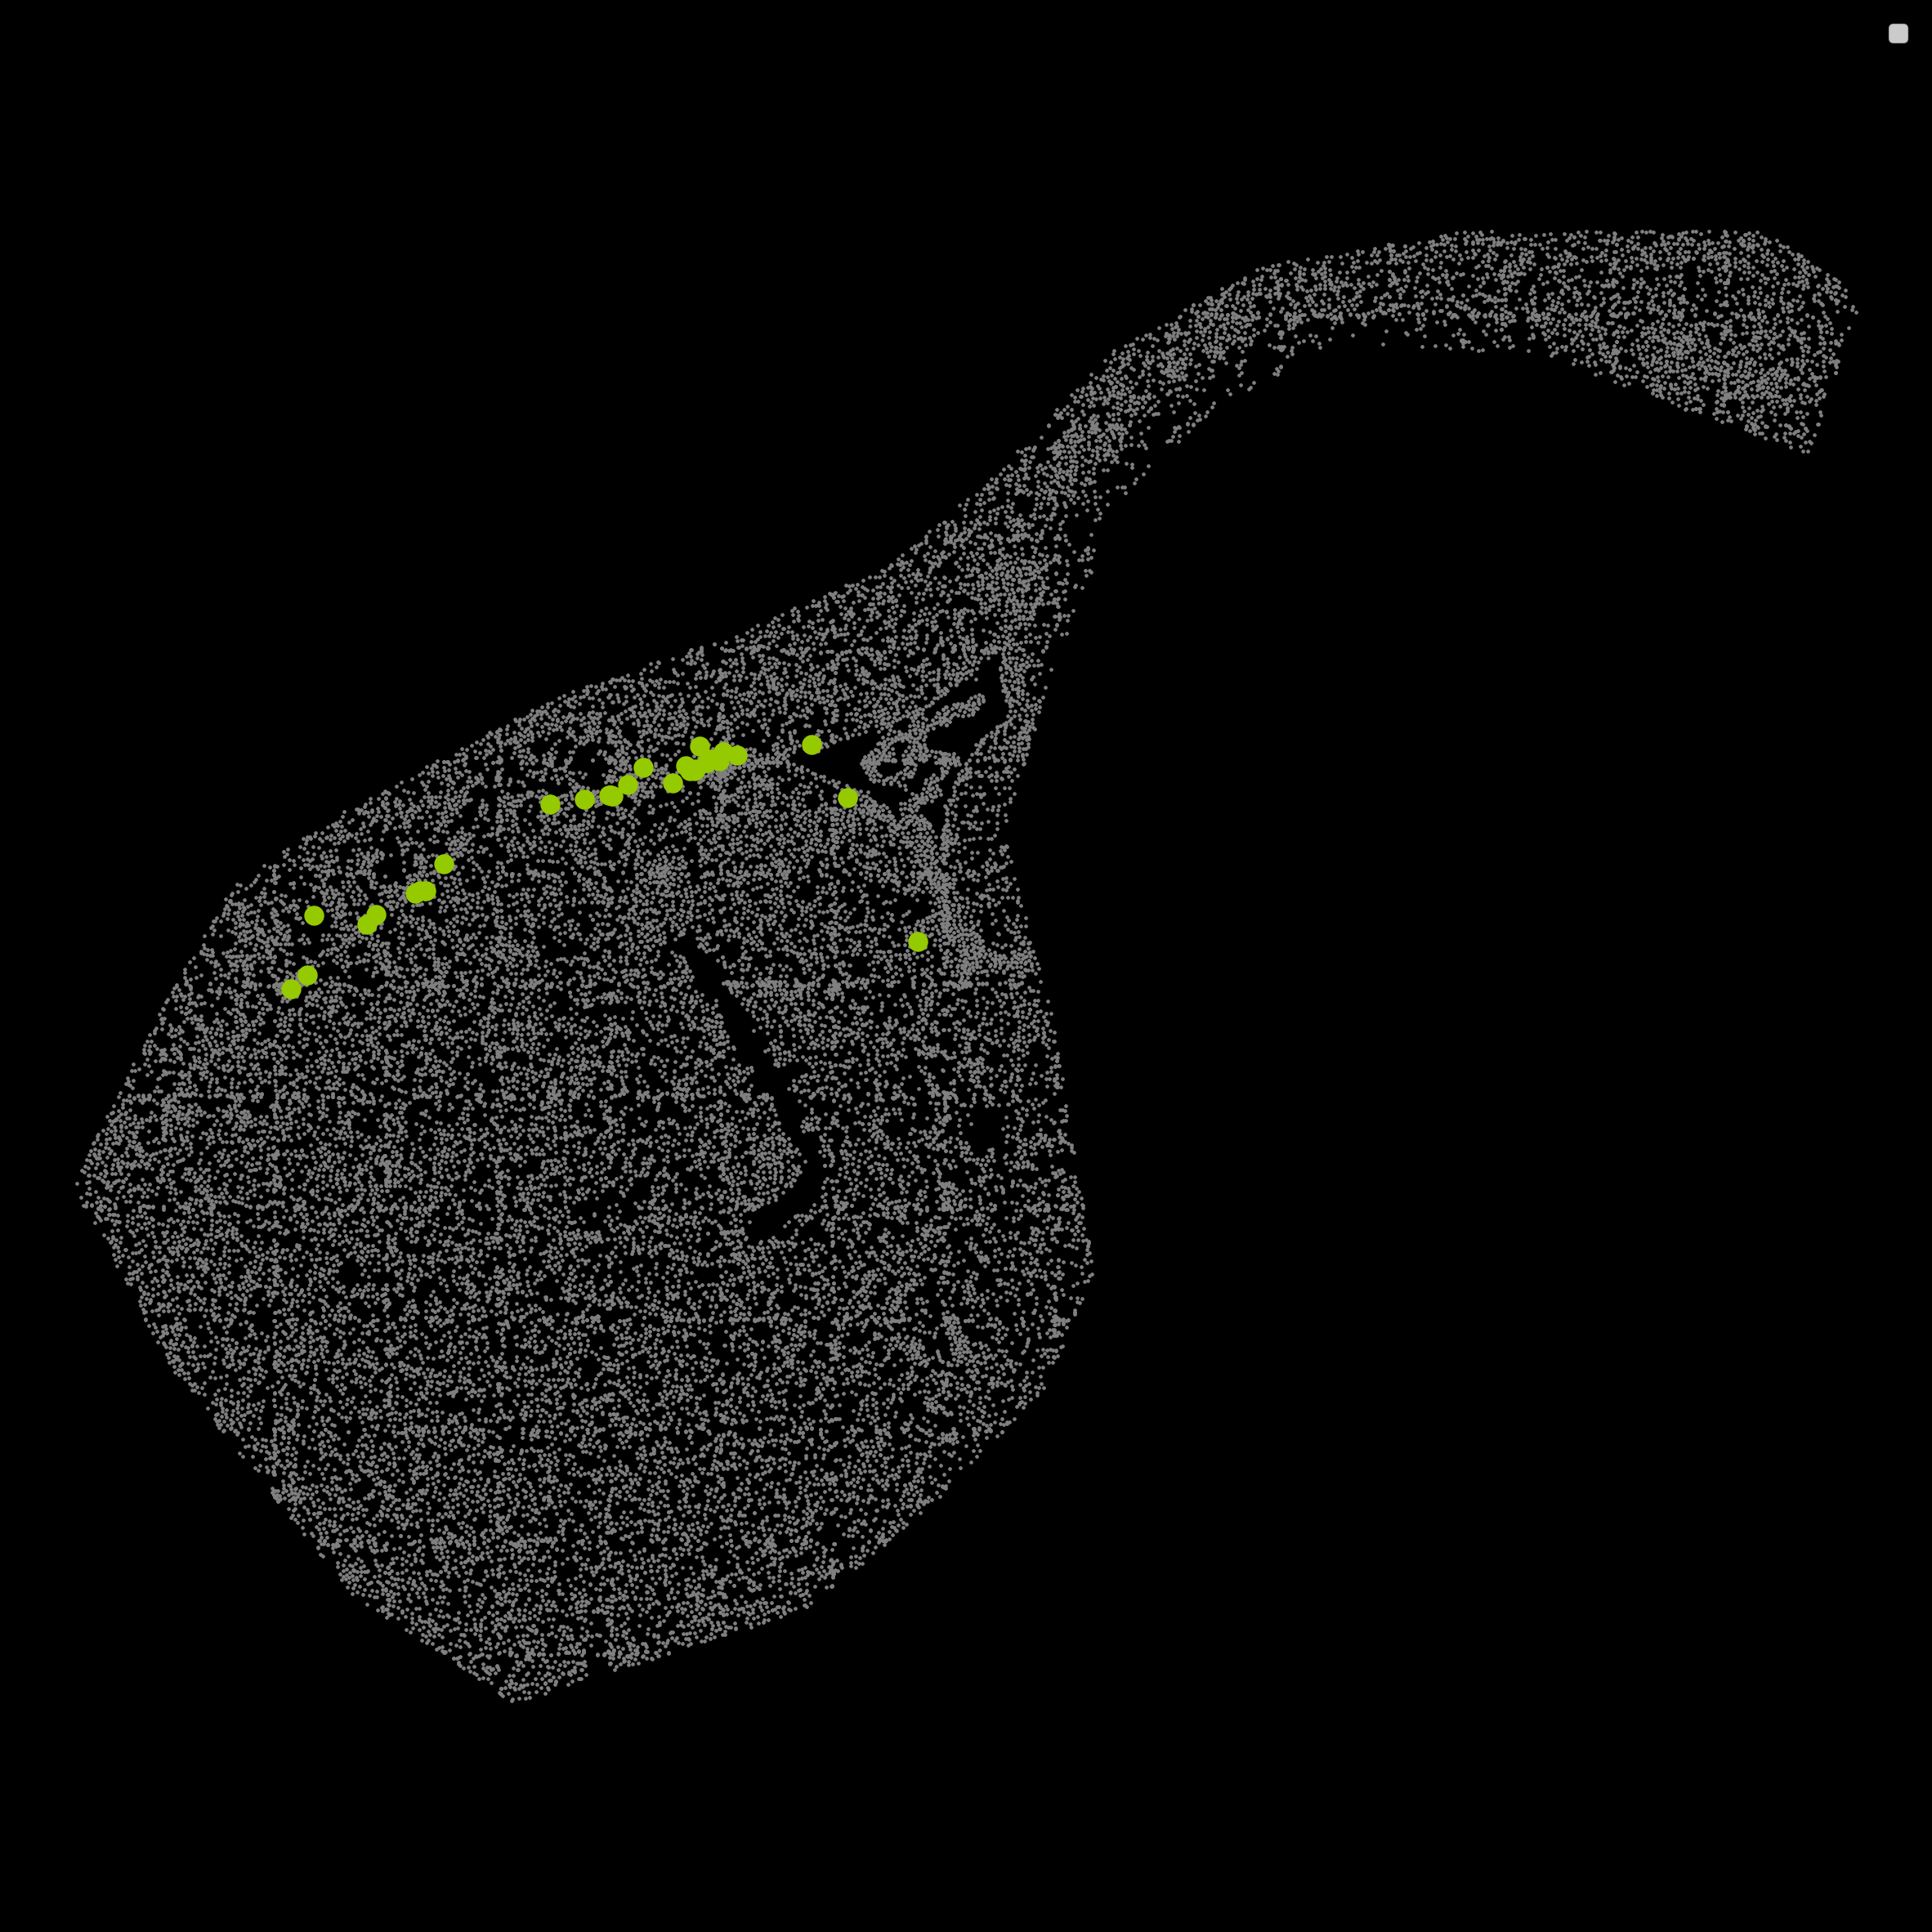

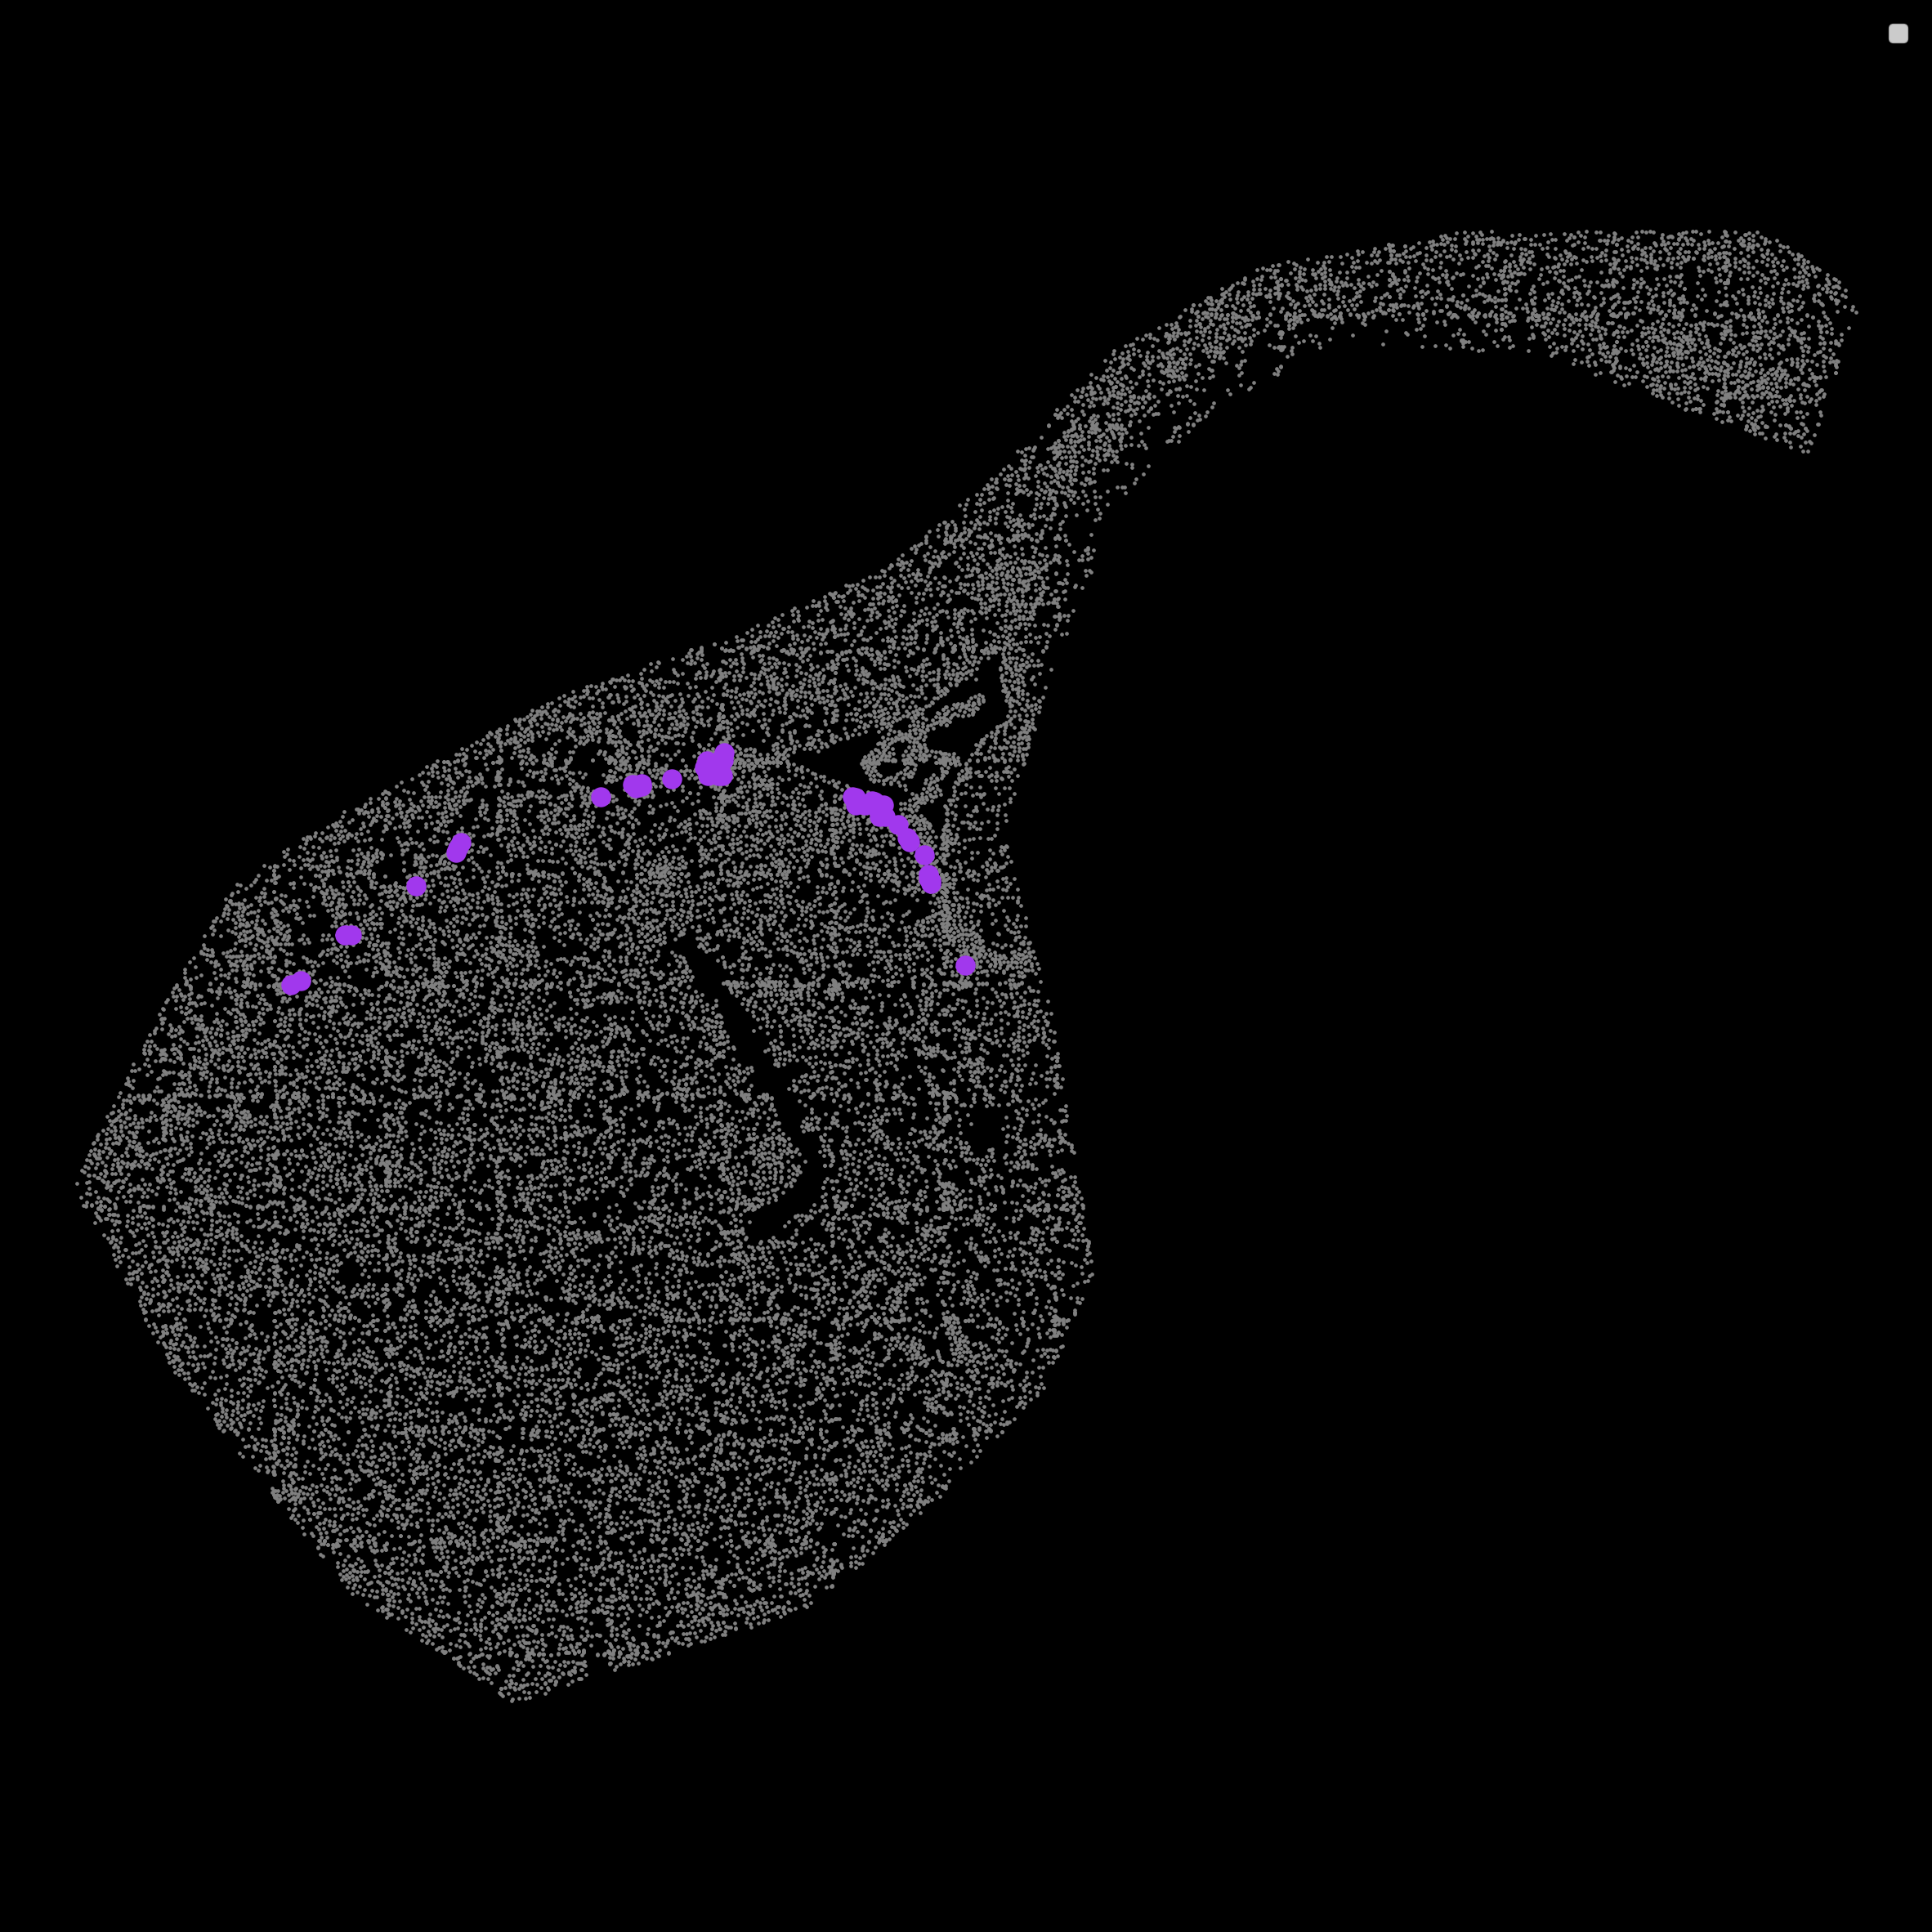

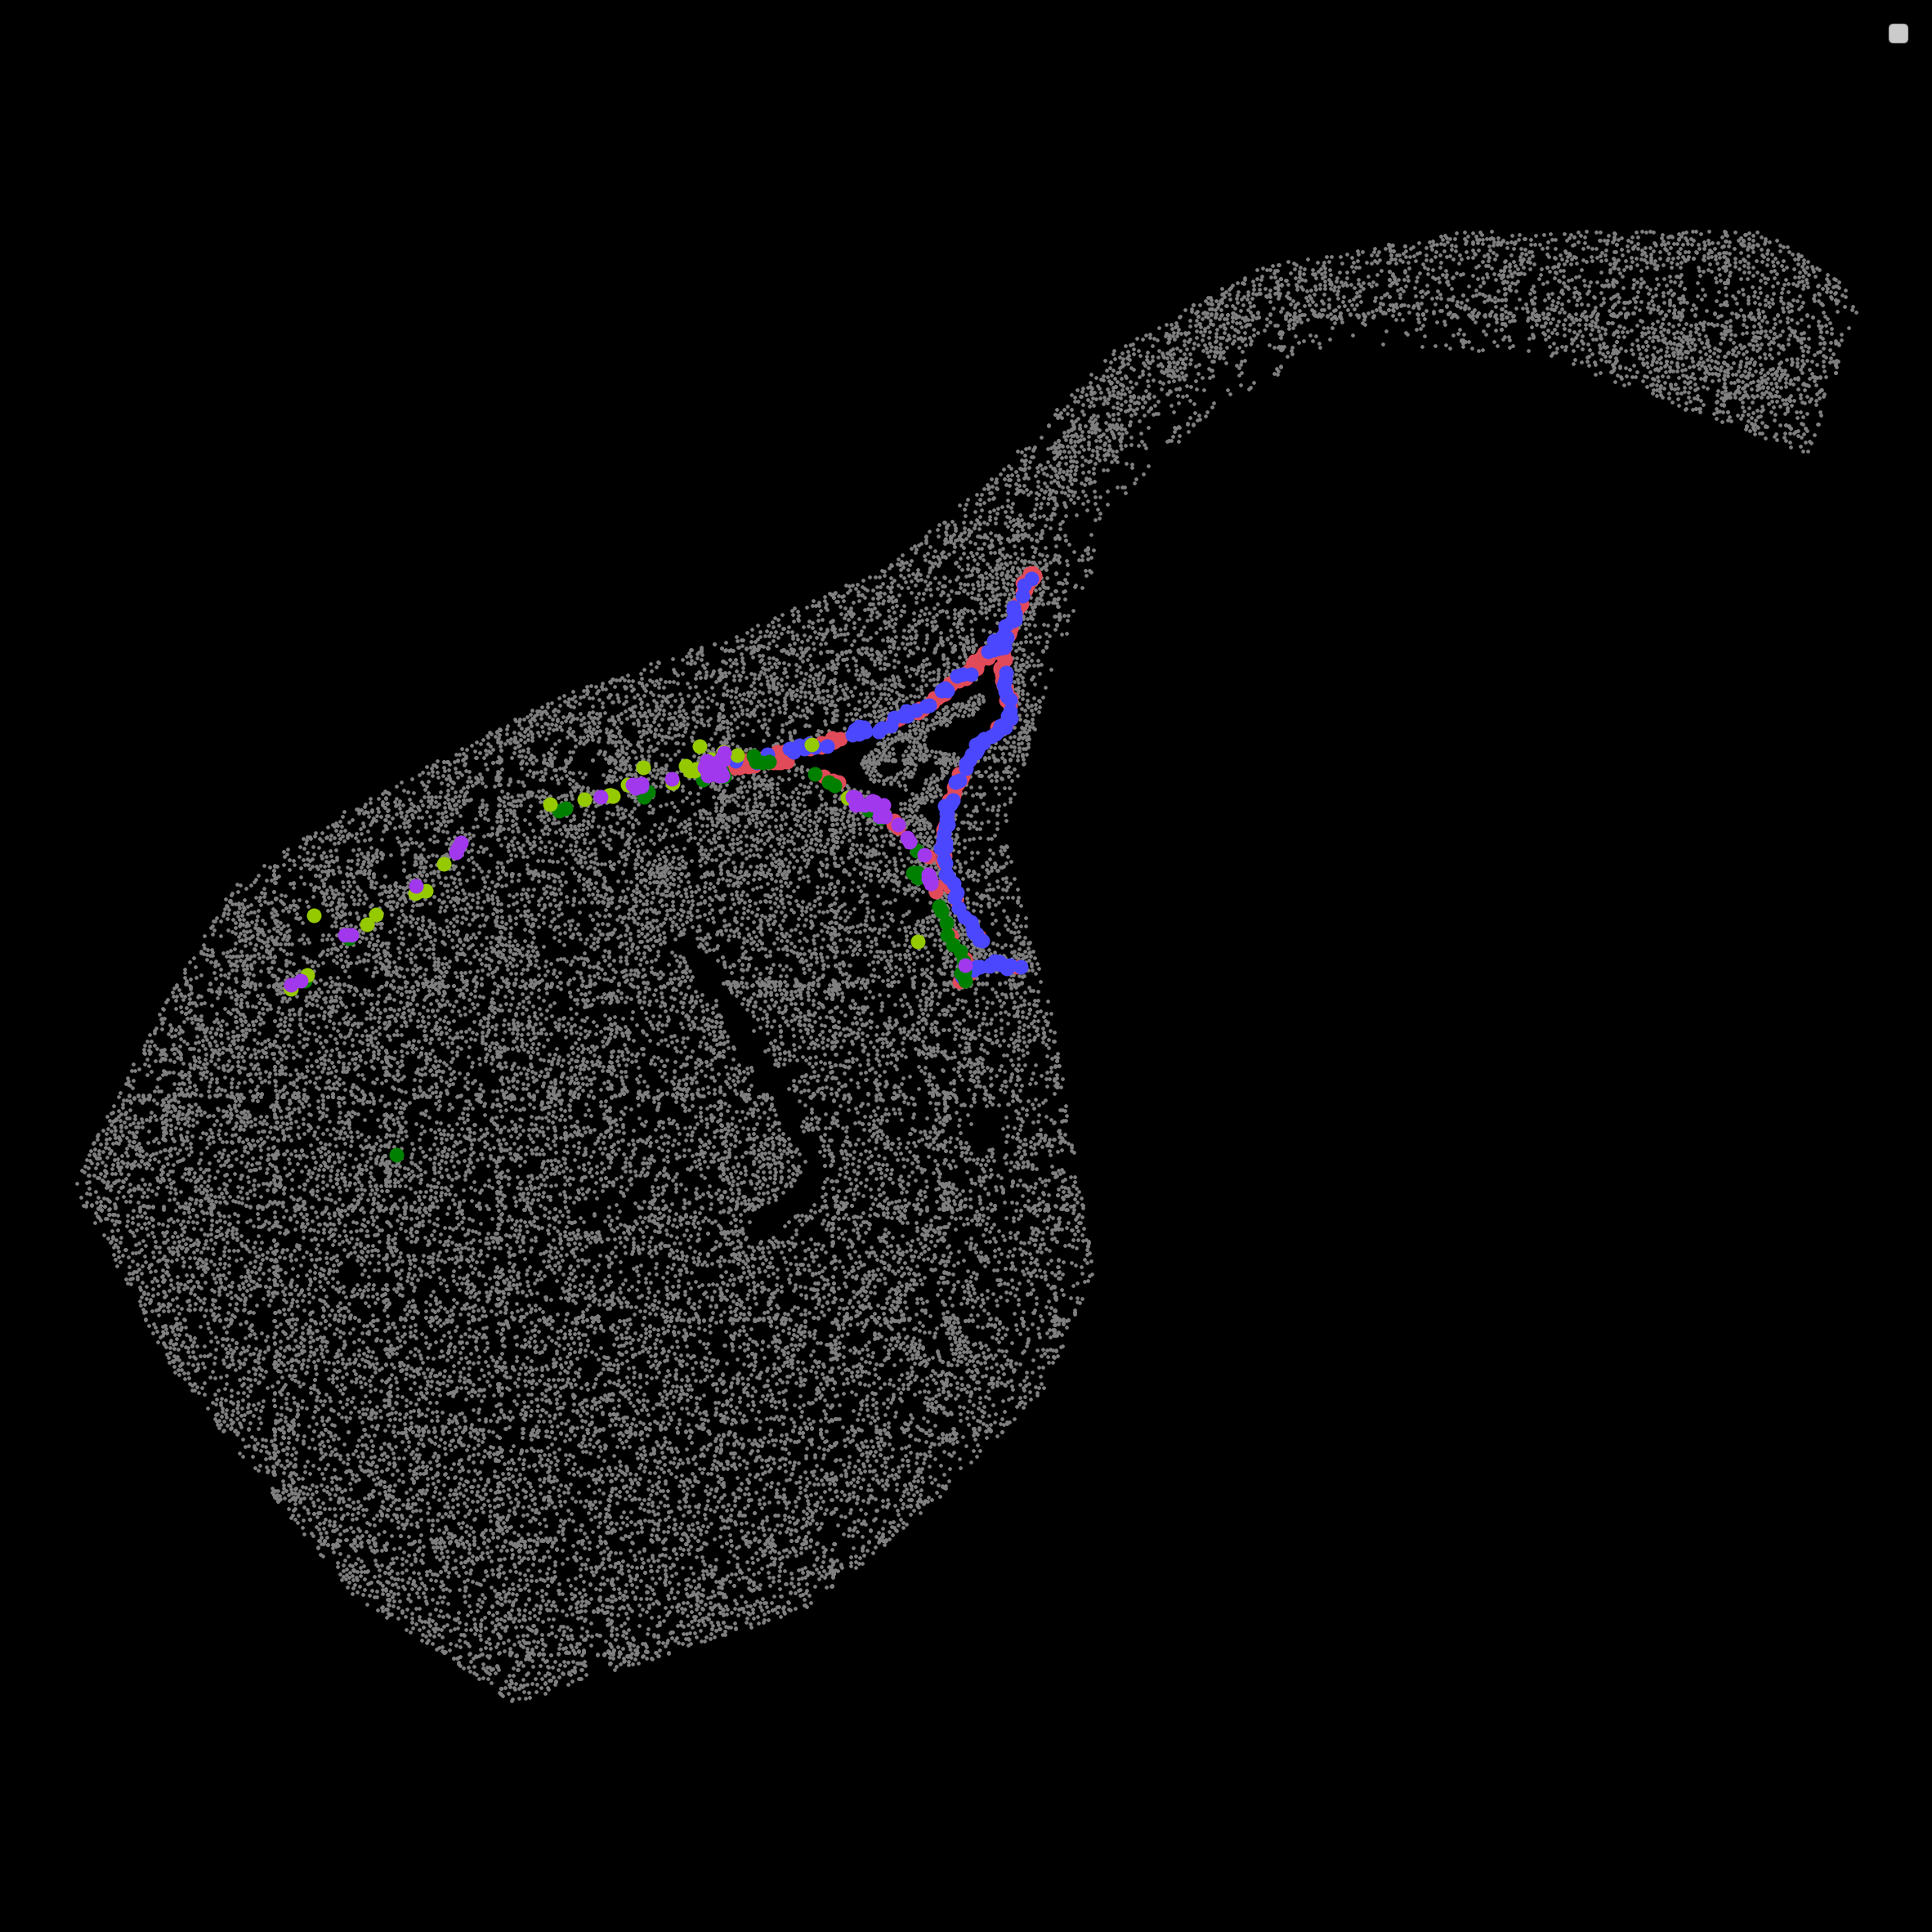

In [16]:
# plot the stages
ptb22j.plot_cluster_scdata("neurogenesis_pathway", clusters=[neu_groups[3]], ref=ptb22, sbig=400)
ptb22j.plot_cluster_scdata("neurogenesis_pathway", clusters=[neu_groups[4]], ref=ptb22, sbig=400)
ptb22j.plot_cluster_scdata("neurogenesis_pathway", clusters=[neu_groups[5]], ref=ptb22, sbig=400)
ptb22j.plot_cluster_scdata("neurogenesis_pathway", clusters=neu_groups[1:-1], ref=ptb22, sbig=200)

/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


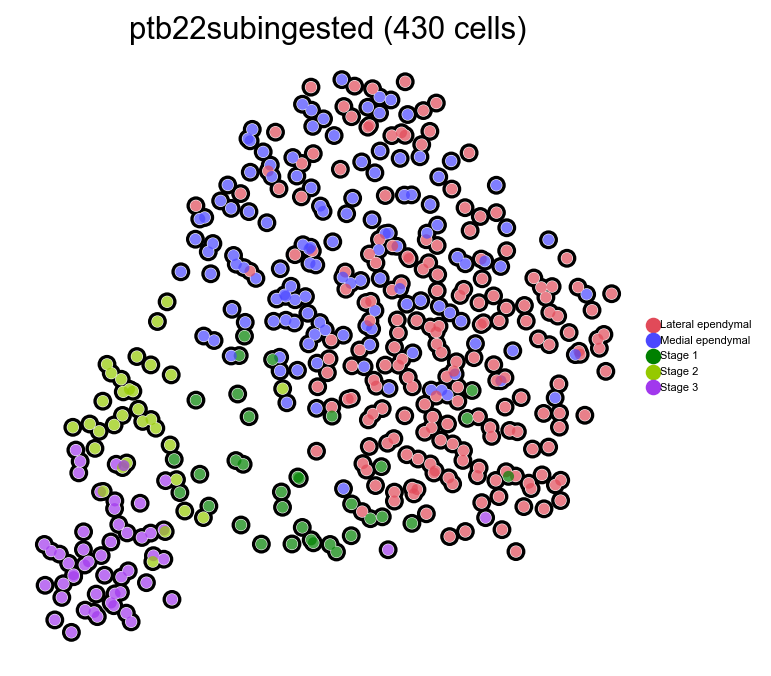

In [17]:
# reumap the subset of the svz pathway
ptb22sub = ptb22j.get_cluster(neu_groups[1:-1], "neurogenesis_pathway")
ptb22subj = Jenie(ptb22sub, "ptb22subingested", "ptb22subingested", "neurogenesis_pathway")
ptb22subj.reprocess()
ptb22subj.umap("neurogenesis_pathway", fig=(5,5), size=100, legend="right margin")

# Figure C

PCA plot of SVZ-Stage 1 cells from 1 year old control and PTBP1-ASO injected mice and the genes along the axes.

### Ingest different control and treatment data to reference

In [25]:
ref = sc.read("../DataF/fig5/final_reference_4week_svz.h5ad")

In [27]:
c5sal1 = sc.read("../DataF/fig5/cbm5/saline1_cbm5_cut.h5ad")

d = c5sal1

vars1 = list(d.var.index)
vars2 = list(ref.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = ref[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='neurogenesis_pathway')

c5sal1ing = d.copy()

Genes in common: 216
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


In [28]:
c5sal2 = sc.read("../DataF/fig5/cbm5/saline2_cbm5_cut.h5ad")

d = c5sal2

vars1 = list(d.var.index)
vars2 = list(ref.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = ref[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='neurogenesis_pathway')

c5sal2ing = d.copy()

Genes in common: 216
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


In [29]:
c5ptb1 = sc.read("../DataF/fig5/cbm5/ptb1_cbm5_cut.h5ad")

d = c5ptb1

vars1 = list(d.var.index)
vars2 = list(ref.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = ref[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='neurogenesis_pathway')

c5ptb1ing = d.copy()

Genes in common: 216
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


In [30]:
c5ptb2 = sc.read("../DataF/fig5/cbm5/ptb2_cbm5_cut.h5ad")

d = c5ptb2

vars1 = list(d.var.index)
vars2 = list(ref.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = ref[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='neurogenesis_pathway')

c5ptb2ing = d.copy()

Genes in common: 216
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


### PCA on stage 1 cells

/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_20230/4254496897.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subc5sal1ing.obs["treatment"] = "c5sal1ing"
/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_20230/4254496897.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subc5sal2ing.obs["treatment"] = "c5sal2ing"
/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_20230/4254496897.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subc5ptb1ing.obs["treatment"] = "c5ptb1ing"
/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_20230/4254496897.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subc5ptb2ing.obs["treatment"] = "c5ptb2ing"
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages

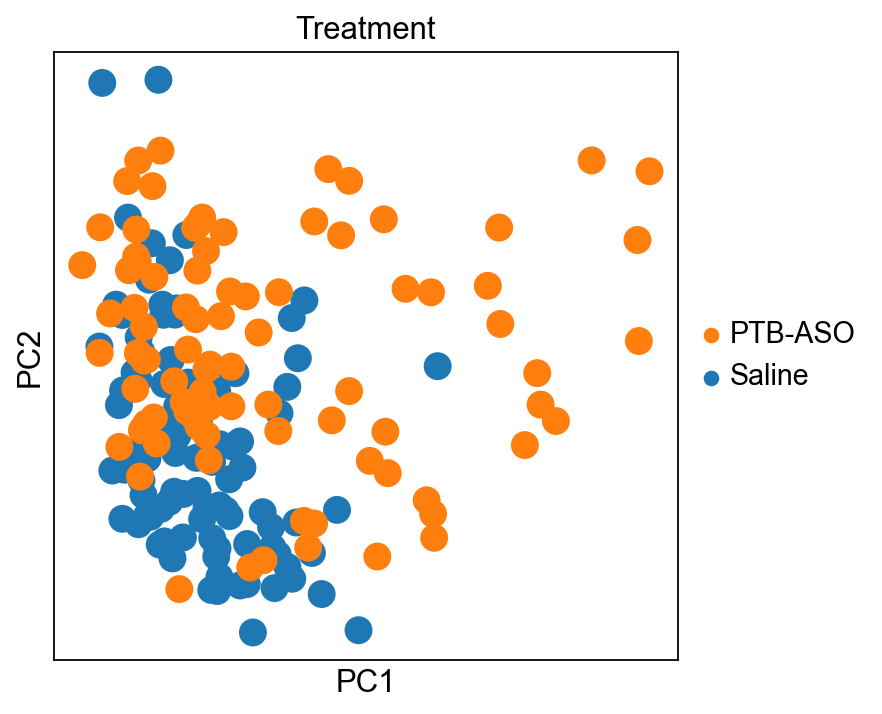

/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8942 (\N{VERTICAL ELLIPSIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


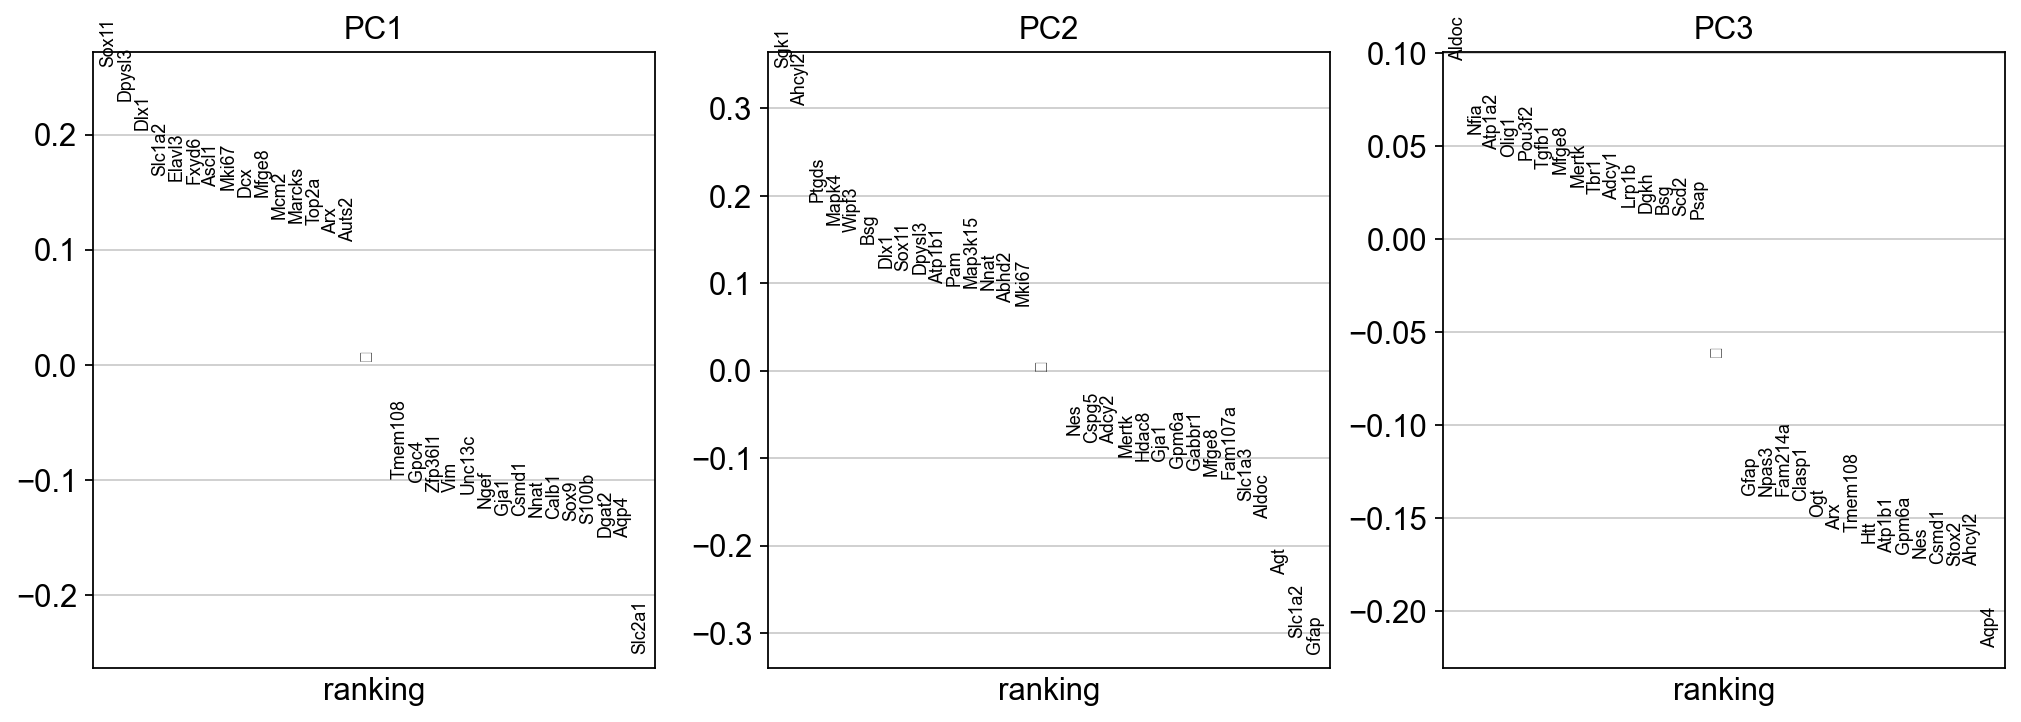

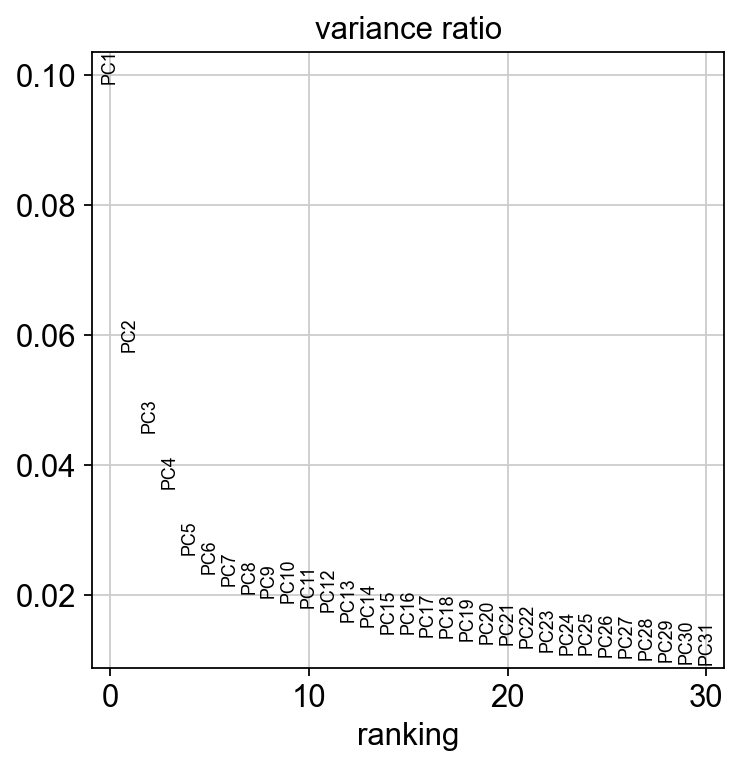

In [23]:
# subset neurogenesis pathway
subc5sal1ing = c5sal1ing[c5sal1ing.obs["neurogenesis_pathway"].isin(neu_groups)]
subc5sal2ing = c5sal2ing[c5sal2ing.obs["neurogenesis_pathway"].isin(neu_groups)]
subc5ptb1ing = c5ptb1ing[c5ptb1ing.obs["neurogenesis_pathway"].isin(neu_groups)]
subc5ptb2ing = c5ptb2ing[c5ptb2ing.obs["neurogenesis_pathway"].isin(neu_groups)]

# add treatment tags
subc5sal1ing.obs["treatment"] = "c5sal1ing"
subc5sal2ing.obs["treatment"] = "c5sal2ing"
subc5ptb1ing.obs["treatment"] = "c5ptb1ing"
subc5ptb2ing.obs["treatment"] = "c5ptb2ing"

# merge files
comsubcbm5 = anndata.concat([subc5sal1ing, subc5sal2ing, subc5ptb1ing, subc5ptb2ing])

# subset stage 1
stage1cbm5 = comsubcbm5[comsubcbm5.obs["neurogenesis_pathway"] == "Stage 1"]

# do stage 1 pca
sc.tl.pca(stage1cbm5)
sc.pl.pca_overview(stage1cbm5, color="Treatment", palette=[ "tab:orange","tab:blue"])

# Figure D

Violin plots of key genes in the two groups in stage 1 cells 

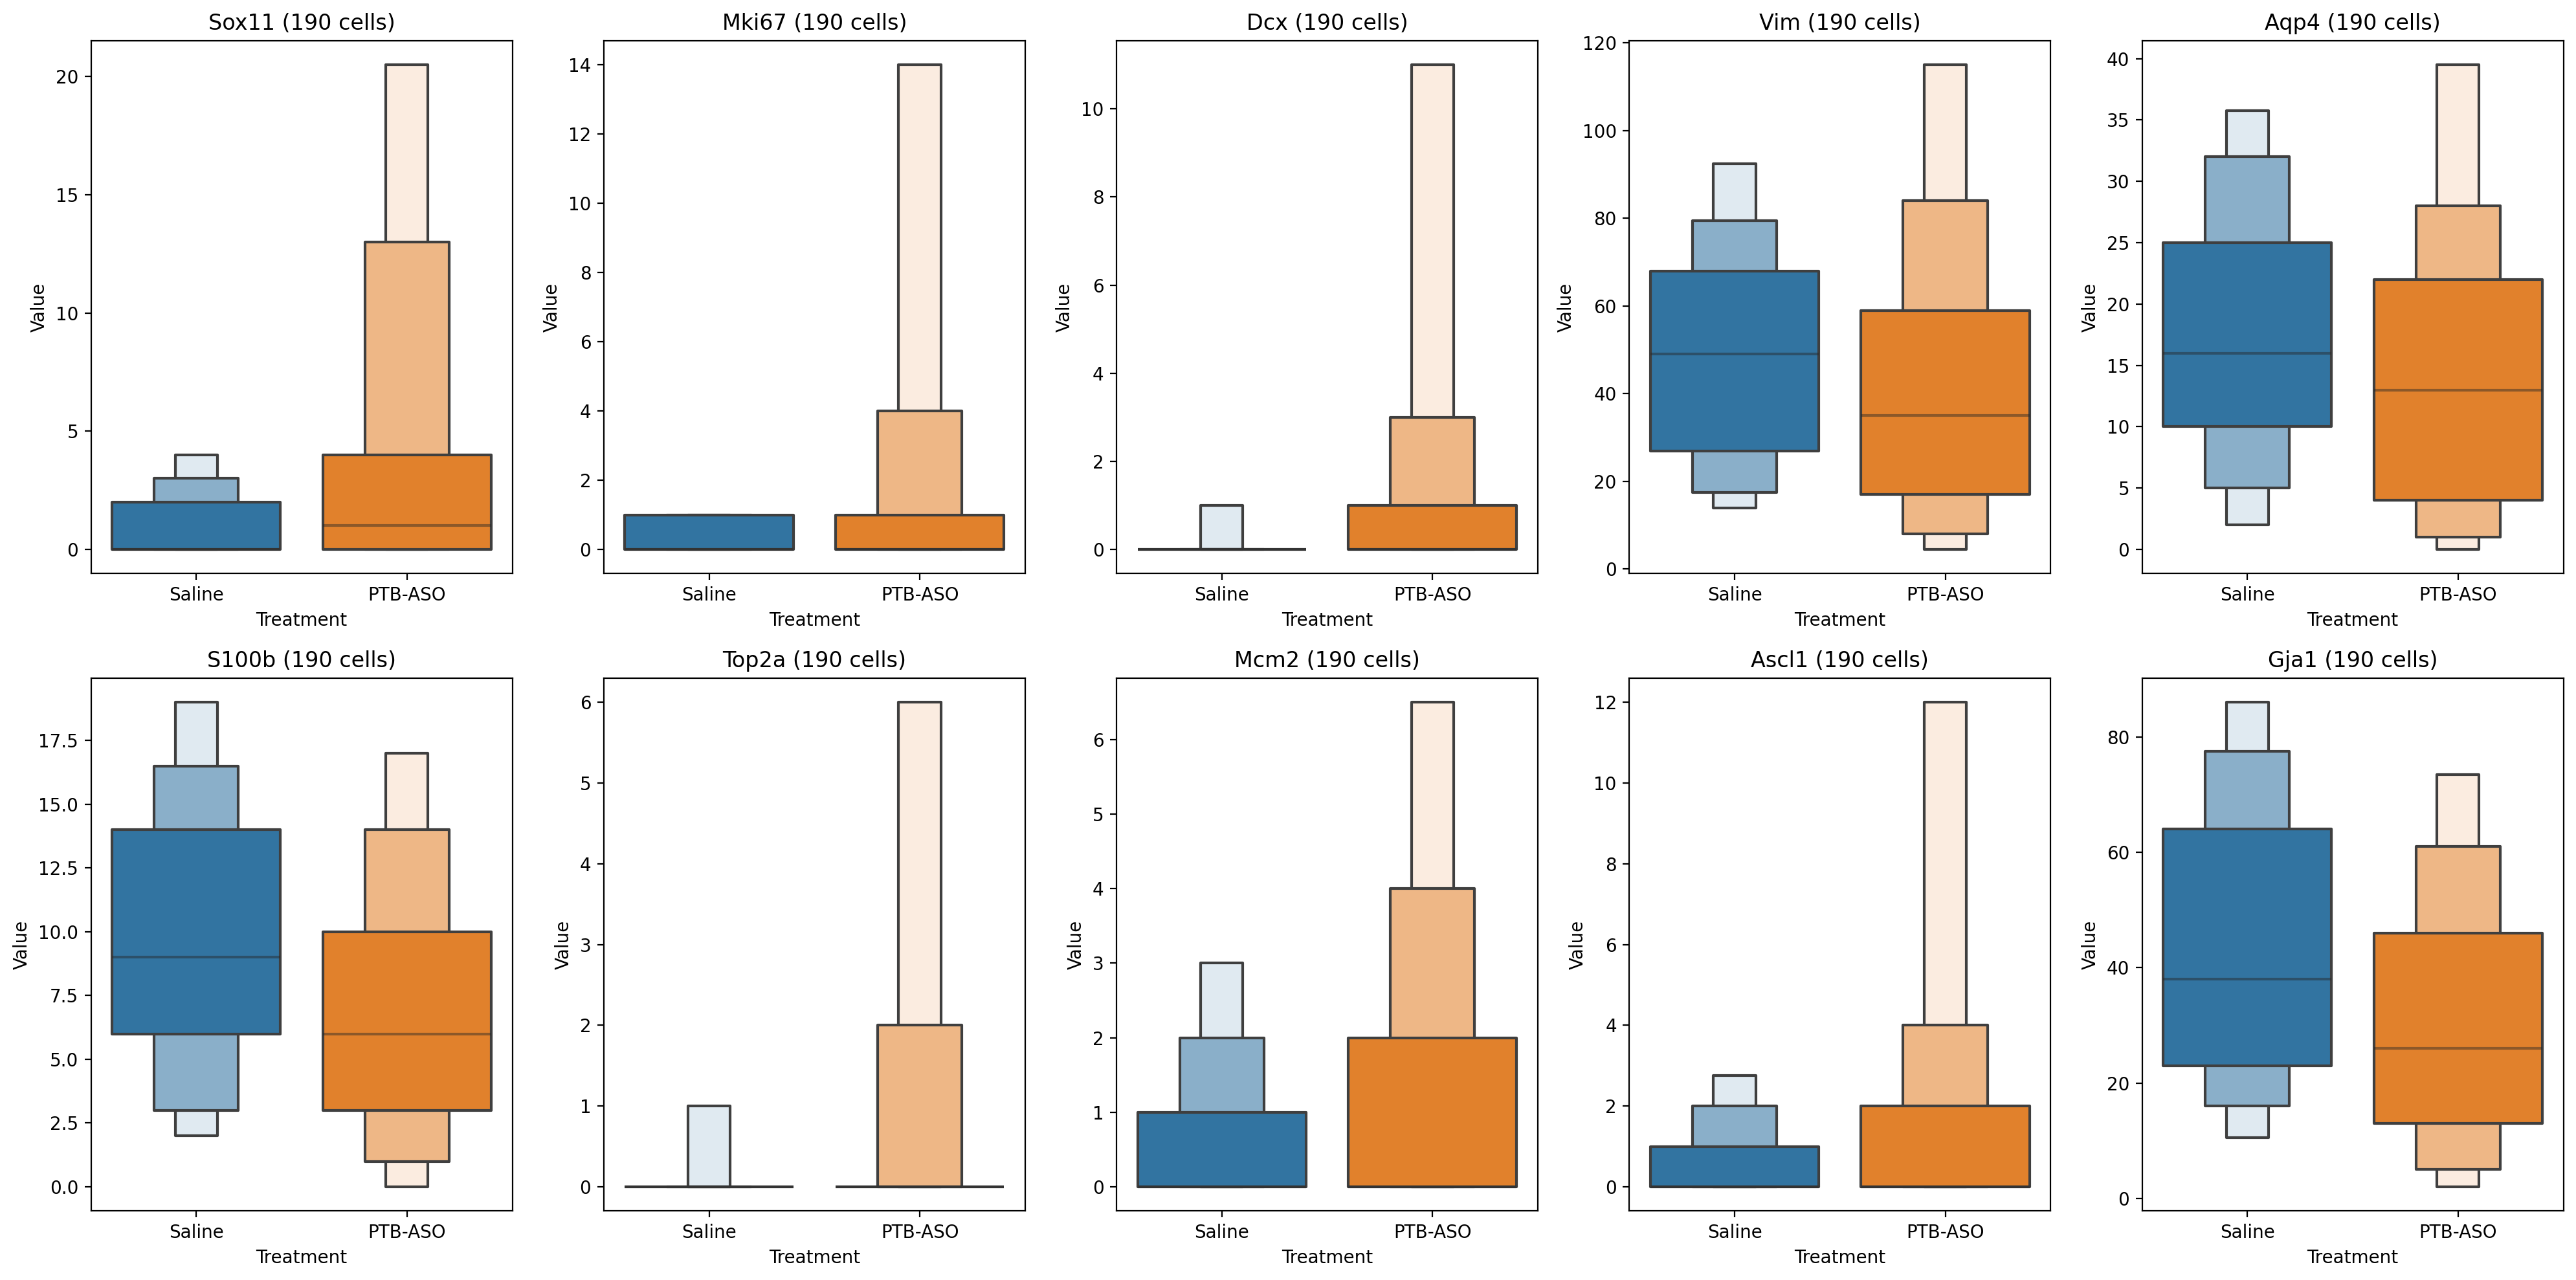

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use("default")
d = stage1cbm5

genes = [
    "Sox11",
    "Mki67",
    "Dcx",
    "Vim",
    "Aqp4",
    "S100b",
    "Top2a",
    "Mcm2",
    "Ascl1",
    "Gja1",
    ]

data = {
    # "Ptbp1": d.obs["New_PTB"],
    #   
    # "Gad1": d.layers["Raw counts"][:, d.var_names.get_loc("Gad1")],  
    # "Prox1": d.layers["Raw counts"][:, d.var_names.get_loc("Prox1")],  
    "celltype": d.obs["Treatment"].tolist(),  
}

for gene in genes: 
    data[gene]= d.layers["Raw counts"][:, d.var_names.get_loc(gene)]
df = pd.DataFrame(data)

fig, axs = plt.subplots(2, 5, figsize=(20,10), dpi=100, facecolor="w")
for i, gene in enumerate(genes):
    ax = axs[np.unravel_index(i, (2,5))]
    df_melted = df.melt(id_vars=[gene], value_vars=["celltype"])
    sns.boxenplot(data=df_melted, x='value', y=gene, ax=ax, showfliers=False)
    # plt.title(cell)
    # plt.xlabel('Gene')
    # plt.ylabel('Value')

    # nums = list(np.sum(adata[adata.obs["batch"] == mouse].X, axis=1).flat)
    # plot_histogram(ax, nums, xmax=25000)
    ax.set_xlabel("Treatment")
    ax.set_ylabel("Value")
    # treatment = "Saline" if i < 3 else "PTB-ASO"
    ax.set_title(f"{gene} ({len(df_melted):,d} cells)")
plt.tight_layout()
# plt.savefig("Plots/scrna_all_gens_total_tx_per_cell.png", dpi=300, bbox_inches="tight")

### Figure G

Brain projection, umap, and paga analysis of SVZ pathway in 1 year old control

In [23]:
# ingest control to svz
noninj3 = sc.read("../Data/new_paths/non_injection/adatasvz_neuro_noastro_non_injected_3_31_iset1.h5ad")

d = noninj3

vars1 = list(d.var.index)
vars2 = list(ref.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = ref[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='neurogenesis_pathway')

noninj3ing = d.copy()

# subset the svz pathway
subnoninj3 = noninj3ing[noninj3ing.obs["neurogenesis_pathway"].isin(neu_groups)]

Genes in common: 275
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


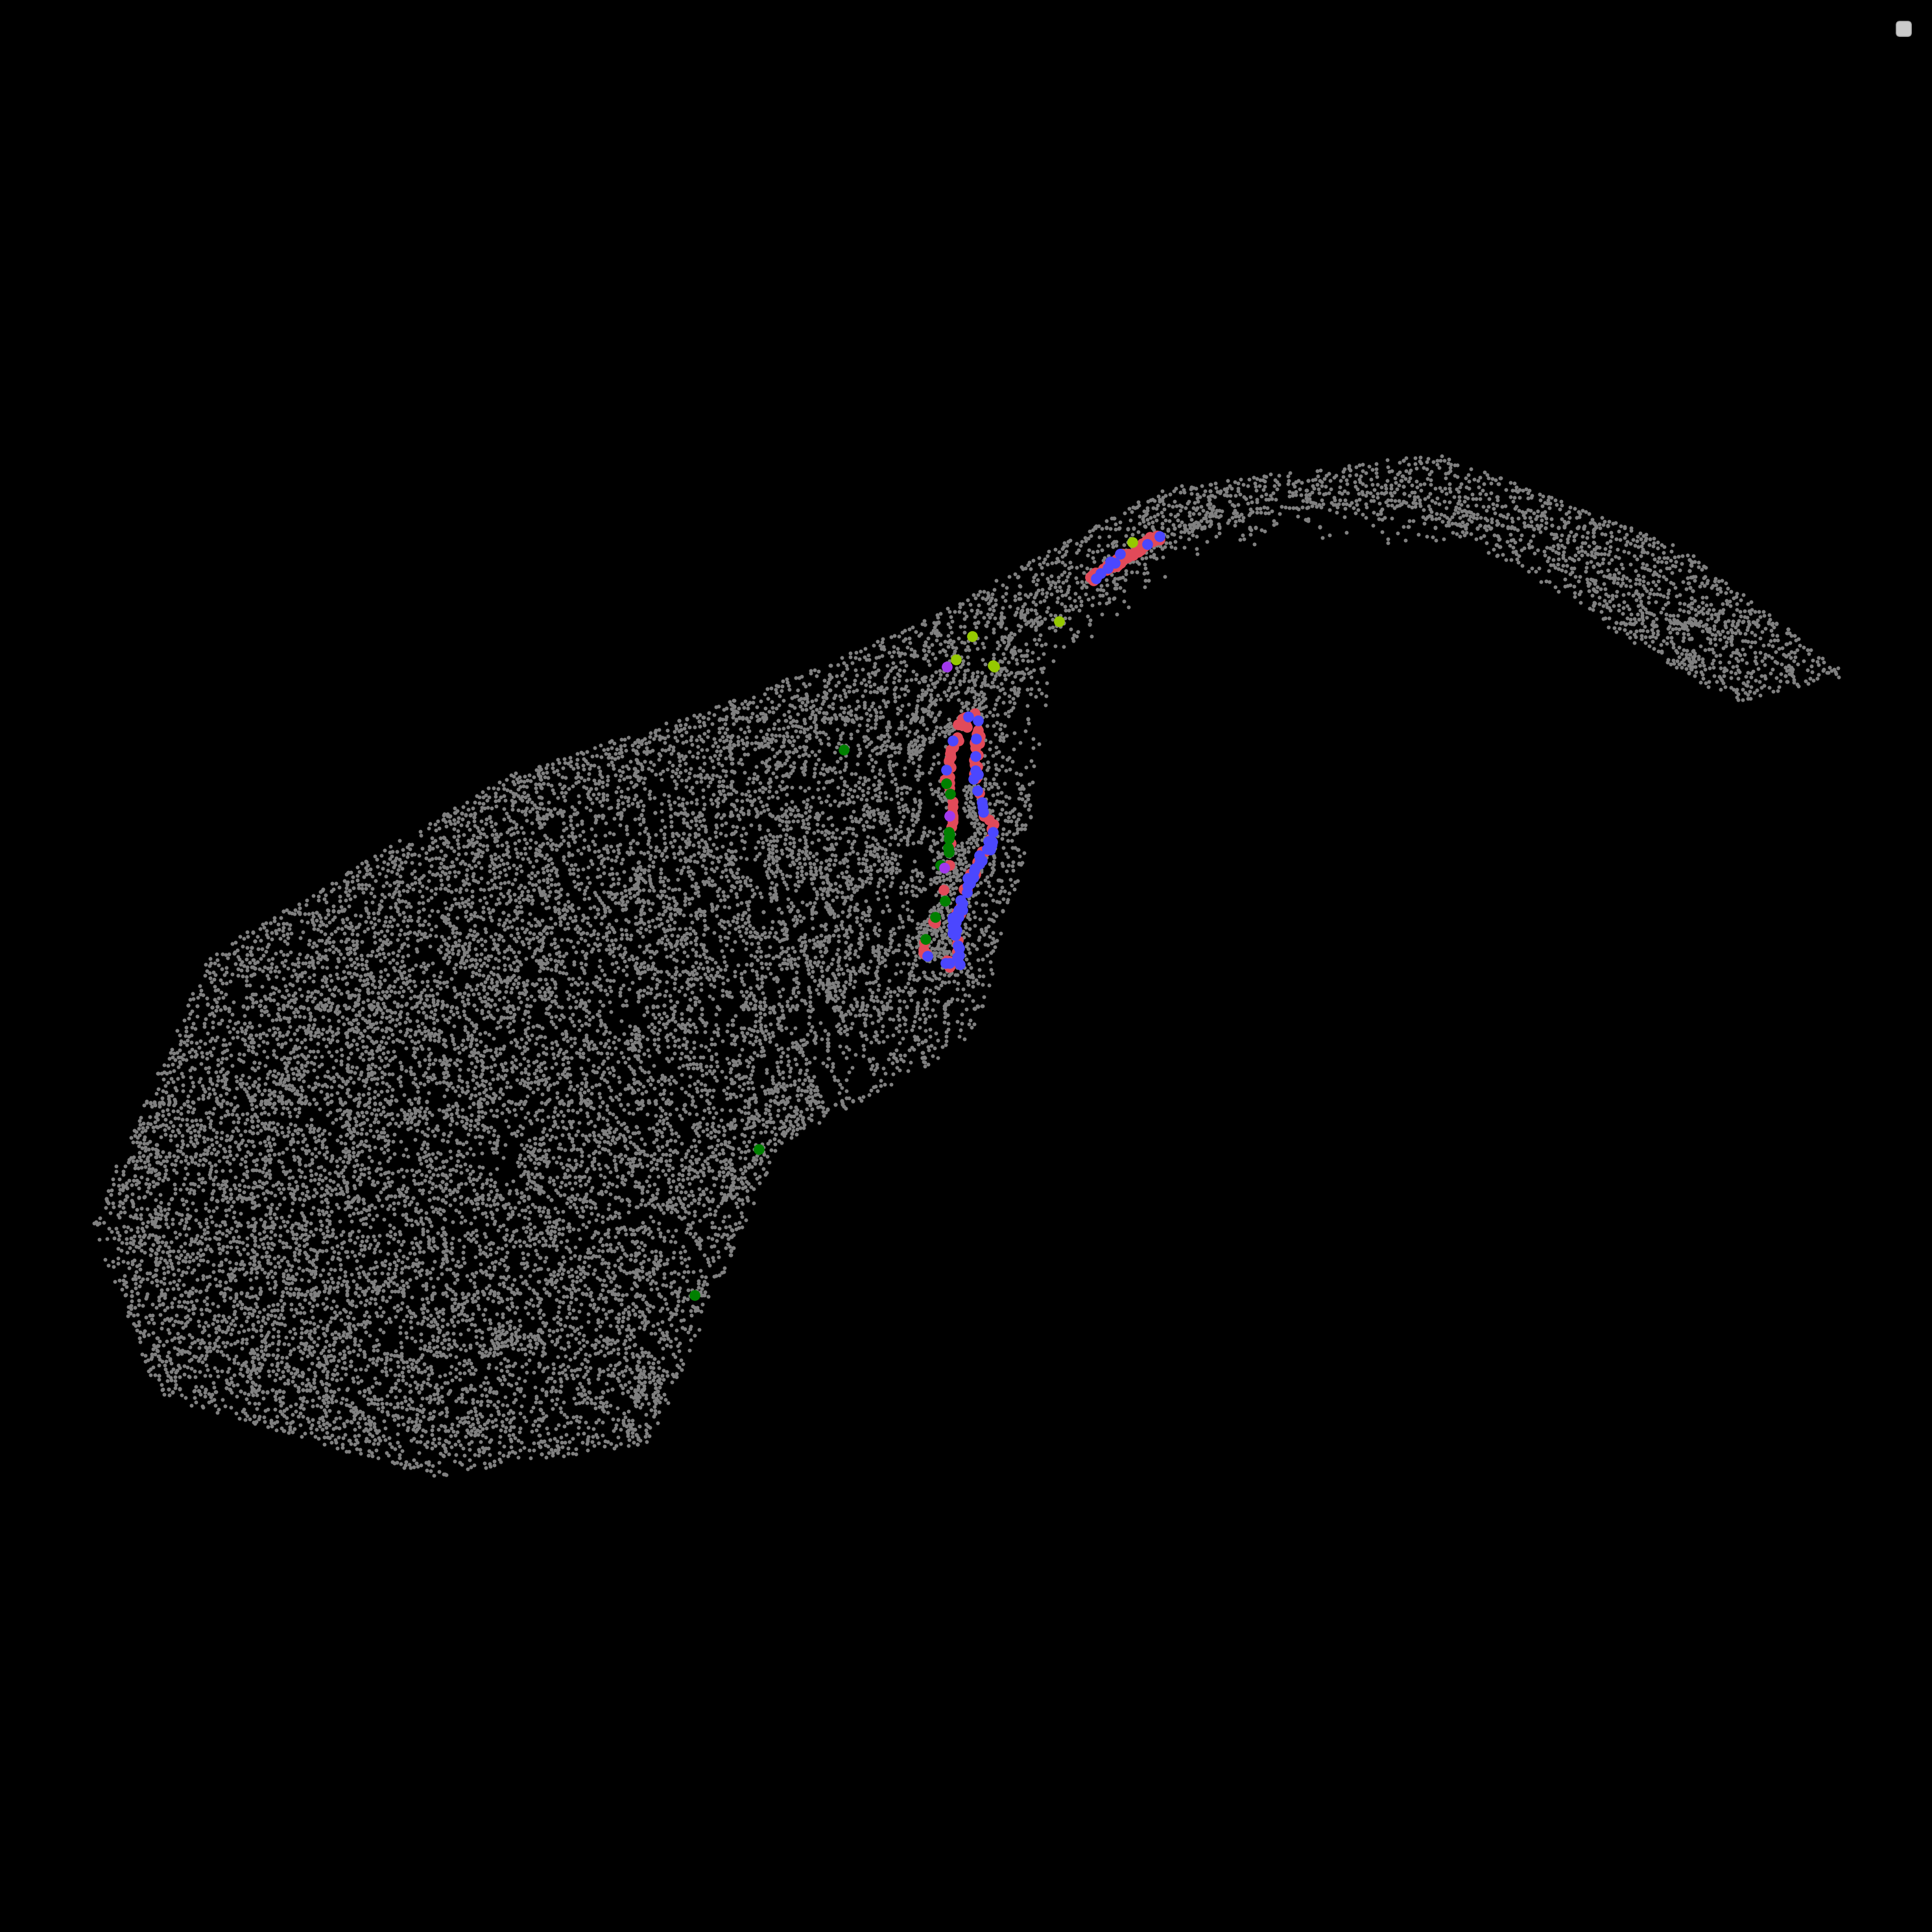

In [24]:
subnoninj3j = Jenie(subnoninj3, "subnoninj3", "subnoninj3", "neurogenesis_pathway")
subnoninj3j.plot_cluster_scdata("neurogenesis_pathway", clusters=neu_groups[1:-1], ref=noninj3, sbig=100)

In [25]:
refumap = sc.read("../Data/svzmoreclusters4week.h5ad")

In [26]:
# ingest subset svz pathway to svz umap
d = subnoninj3j.get_cluster(neu_groups[1:-1], group="neurogenesis_pathway").copy()

vars1 = list(d.var.index)
vars2 = list(refumap.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = refumap[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='leiden')

umapnoninj3ing = d.copy()

Genes in common: 275
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


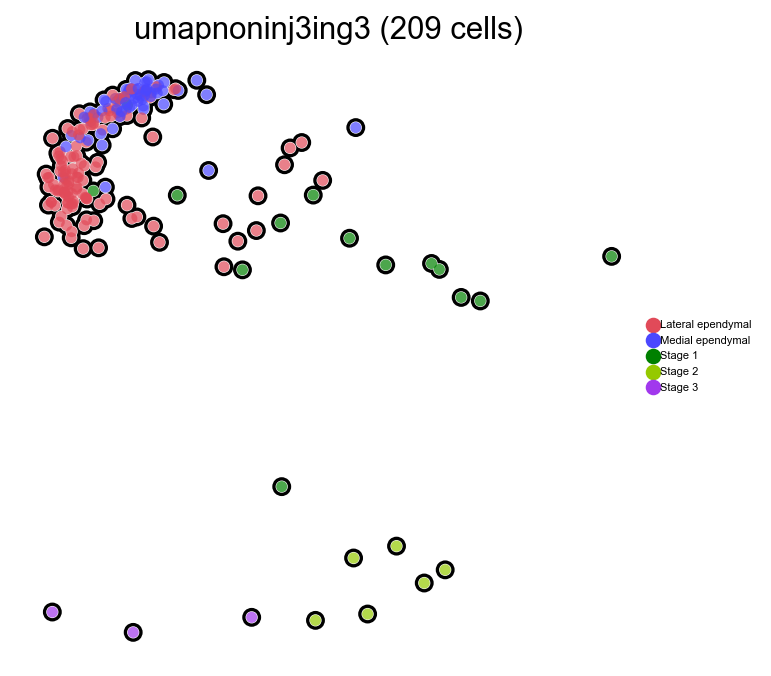

In [27]:
umapnoninj3ingj = Jenie(umapnoninj3ing, "umapnoninj3ing3", "umapnoninj3ing3", "neurogenesis_pathway")
umapnoninj3ingj.umap("neurogenesis_pathway", fig=(5,5), size=100, legend="right margin")

In [28]:
umapnoninj3ingj.data.obs.groupby("neurogenesis_pathway").size()

neurogenesis_pathway
Lateral ependymal    124
Medial ependymal      62
Stage 1               14
Stage 2                6
Stage 3                3
dtype: int64

In [29]:
group="neurogenesis_pathway"
path = [
 'Medial ependymal',
 'Lateral ependymal',
 'Stage 1',
 'Stage 2',
 'Stage 3',
'GABAergic striatum neurons',
 ]


gene_names = [
'Slc1a3',
'Slc2a1',
'Gfap',
'Sox9',
'Nnat',
'Sox11',
'Dlx1',
'Dlx2',
'Gad1',
'Nrgn',
'Pde10a',
'Ptbp1',
'Rest',
]     

/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


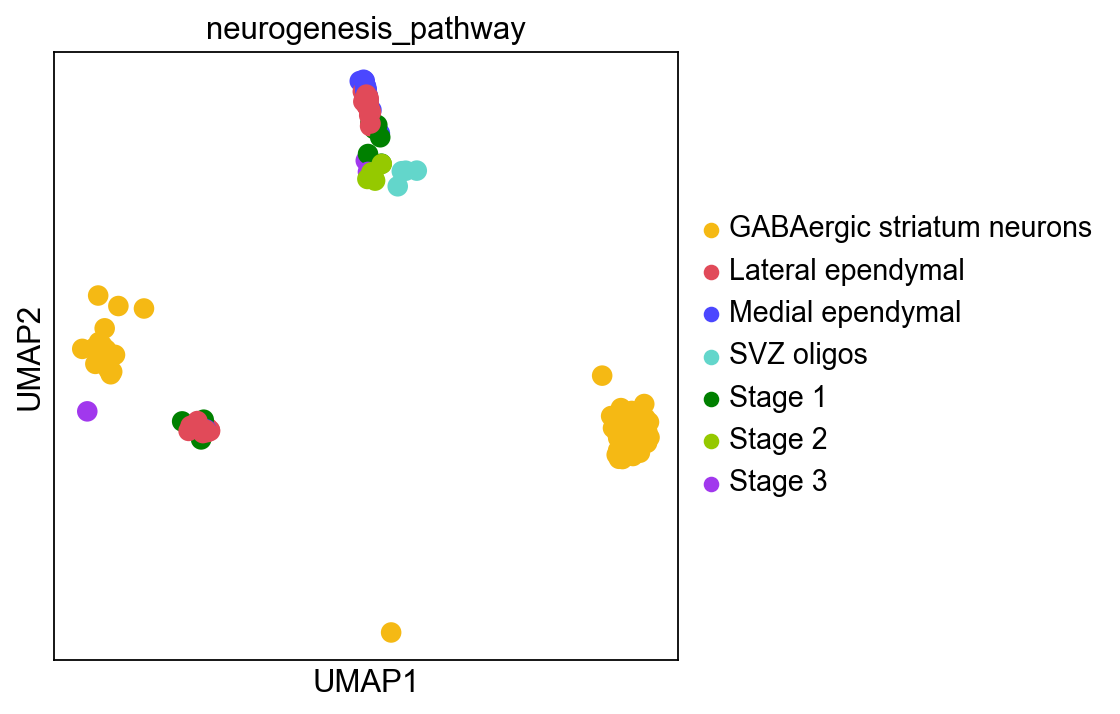

In [35]:
sc.pl.umap(subnoninj3j.data, color="neurogenesis_pathway", palette=Jenie.get_pallete("neurogenesis_pathway"))

In [56]:
d

AnnData object with n_obs × n_vars = 23 × 11
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden', 'neurogenesis_pathway', 'dpt_pseudotime'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'log1p', 'neighbors', 'pca', 'neurogenesis_pathway_colors', 'paga', 'neurogenesis_pathway_sizes', 'diffmap_evals', 'iroot'
    obsm: 'X_pca', 'X_raw', 'X_spatial', 'X_umap', 'rep', 'X_diffmap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [53]:
# function to get min and max of the genes
def get_minmax_genes(adata, genes, group="leiden", percentile=99, min=0):
    data = {}
    for gene in genes:
        in_path = np.in1d(adata.obs[group],path)
        data[gene] = [min, int(np.percentile(adata.obsm["X_raw"][in_path][:,adata.var.index.get_loc(gene)],percentile,axis=0))]
    print(data)
    return data

In [39]:
gene_names

['Slc1a3',
 'Slc2a1',
 'Gfap',
 'Sox9',
 'Nnat',
 'Sox11',
 'Dlx1',
 'Dlx2',
 'Gad1',
 'Nrgn',
 'Pde10a',
 'Ptbp1',
 'Rest']

In [42]:
list(minmaxgenes.keys())

['Slc2a1',
 'Sox9',
 'Nnat',
 'Gfap',
 'Sox11',
 'Dlx1',
 'Dlx2',
 'Gad1',
 'Nrgn',
 'Pde10a',
 'Gabbr1']

In [57]:
get_minmax_genes(subnoninj3j.data, gene_names, "neurogenesis_pathway")

{'Slc2a1': [0, 78], 'Sox9': [0, 55], 'Nnat': [0, 112], 'Gfap': [0, 129], 'Sox11': [0, 11], 'Dlx1': [0, 5], 'Dlx2': [0, 12], 'Gad1': [0, 24], 'Nrgn': [0, 45], 'Pde10a': [0, 222], 'Gabbr1': [0, 73]}


{'Slc2a1': [0, 78],
 'Sox9': [0, 55],
 'Nnat': [0, 112],
 'Gfap': [0, 129],
 'Sox11': [0, 11],
 'Dlx1': [0, 5],
 'Dlx2': [0, 12],
 'Gad1': [0, 24],
 'Nrgn': [0, 45],
 'Pde10a': [0, 222],
 'Gabbr1': [0, 73]}

/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/tools/_paga.py:122: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['paga'] = {}
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/neighbors/__init__.py:924: RuntimeWarning: divide by zero encountered in divide
  Q = scipy.sparse.spdiags(1.0 / q, 0, W.shape[0], W.shape[0])
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/neighbors/__init__.py:934: RuntimeWarning: divide by zero encountered in divide
  self.Z = scipy.sparse.spdiags(1.0 / z, 0, K.shape[0], K.shape[0])
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/paga.py:1229: UserWarning: FixedFormatter should only be used together with FixedLocator
  groups_axis.set_yticklabels(['', xlabel, ''], fontsize=ytick_fontsize)
/Users/kjenie/DataspellP

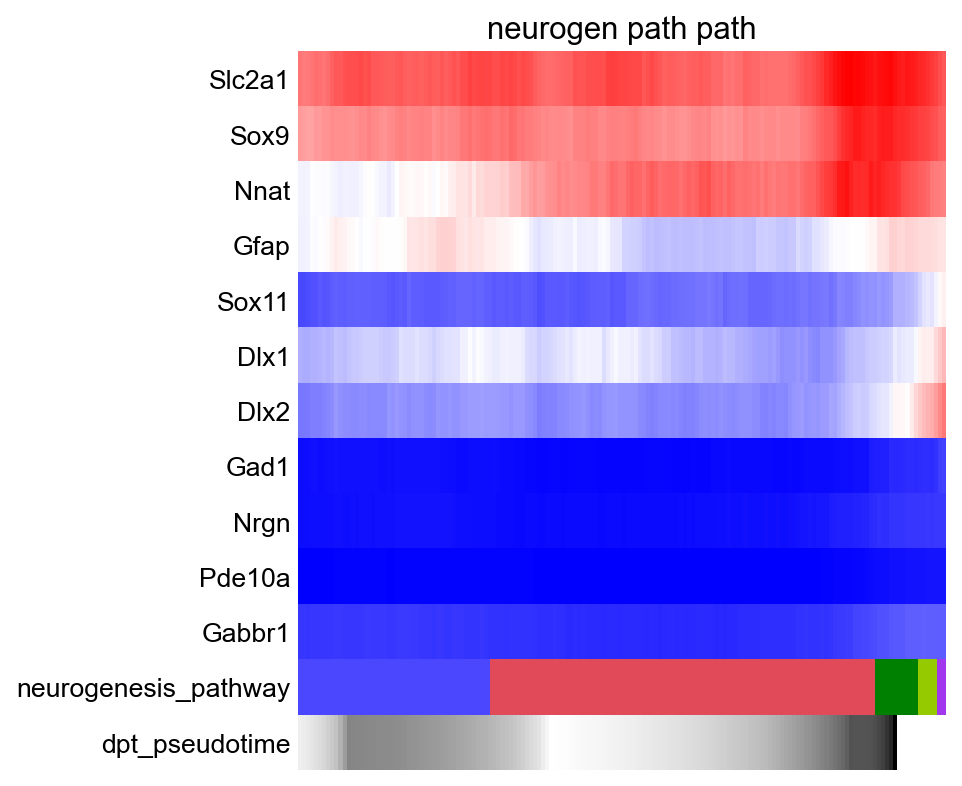

In [58]:
# paga analysis
#TODO
minmaxgenes = {
    'Slc2a1': [0, 78],
    'Sox9': [0, 55],
    'Nnat': [0, 112],
    'Gfap': [0, 129],
    'Sox11': [0, 11],
    'Dlx1': [0, 5],
    'Dlx2': [0, 12],
    'Gad1': [0, 24],
    'Nrgn': [0, 45],
    'Pde10a': [0, 222],
    'Gabbr1': [0, 73]
 }

gene_names = list(minmaxgenes.keys())

     

d = subnoninj3j.data.copy()



in_path = np.in1d(d.obs[group],path)
locs = [d.var.index.get_loc(gene) for gene in gene_names]
#Ns = np.sum(d.obsm["X_raw"][in_path],axis=-1)[:,np.newaxis]
#rawcellgenes = d.obsm["X_raw"][in_path][:,locs]/Ns*np.median(Ns)
#rawcellgenes = d.obsm["X_raw"][in_path][:,locs]
# vol = d.obsm['volume'][in_path]
rawcellgenes = d.obsm["X_raw"][in_path][:,:]
# rawcellgenes = rawcellgenes/vol*np.median(vol) ### norm by volume
# Ns = np.sum(rawcellgenes,axis=-1)[:,np.newaxis]
#rawcellgenes = rawcellgenes/Ns*np.median(Ns) ### norm by total counts
rawcellgenes = rawcellgenes[:,locs]

normcellgenes = d.obsm["X_raw"][in_path][:,locs]


for ign in range(rawcellgenes.shape[1]):
    gn = gene_names[ign]
    min_,max_ = minmaxgenes[gn]
    normcellgenes[:,ign] = np.clip((rawcellgenes[:,ign] - min_)/(max_-min_),0,1)


d = d[in_path]
d = d[:, gene_names]

d.X = normcellgenes#np.exp(d.X)-1


descr = 'neurogen path'

sc.tl.paga(d, groups=group)
sc.tl.diffmap(d)
d.uns['iroot'] = np.flatnonzero(d.obs[group]  == "Medial ependymal")[1] ###############starting points
sc.tl.dpt(d)

_, data = sc.pl.paga_path(
        d, path[:-1], gene_names,
        show_node_names=False,
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        # annotations=['pseudotime'],
        show_yticks=True,
        show_colorbar=False,
        color_map='bwr',
        groups_key=group,
        color_maps_annotations={'pseudotime': 'viridis'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)

/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_14338/1711804132.py:46: ImplicitModificationWarning: Trying to modify attribute `.obsm` of view, initializing view as actual.
  normcellgenes[:,ign] = np.clip((rawcellgenes[:,ign] - min_)/(max_-min_),0,1)
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/tools/_paga.py:122: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['paga'] = {}
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/neighbors/__init__.py:924: RuntimeWarning: divide by zero encountered in divide
  Q = scipy.sparse.spdiags(1.0 / q, 0, W.shape[0], W.shape[0])
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/neighbors/__init__.py:934: RuntimeWarning: divide by zero encountered in divide
  self.Z = scipy.sparse.spdiags(1.0 / z, 0, K.shape[0], K.shape[0])
/Users/kjenie/DataspellProje

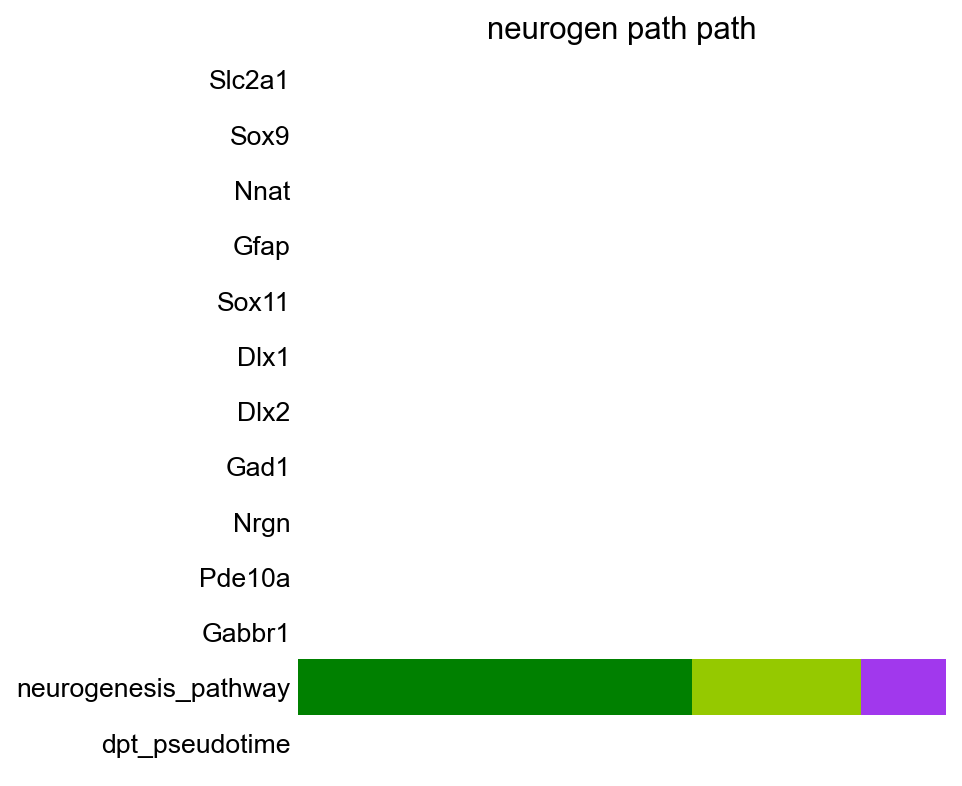

In [52]:
# paga analysis
#TODO
minmaxgenes = {
    # 'Slc1a3': [0, 13],
    'Slc2a1': [0, 60],
    'Sox9': [0, 69],
    'Nnat': [0, 113],
    'Gfap': [0, 333],
    'Sox11': [0, 34],
    'Dlx1': [0, 26],
    'Dlx2': [0, 63],
    'Gad1': [0, 18],
    'Nrgn': [0, 38],
    'Pde10a': [0, 184],
    'Gabbr1': [0, 184],
    # 'Ptbp1': [0, 33],
    # 'Rest': [0, 8]
 }

gene_names = list(minmaxgenes.keys())

     

d = subnoninj3j.get_cluster(["Stage 1", "Stage 2", "Stage 3"], "neurogenesis_pathway")



in_path = np.in1d(d.obs[group],path[2:-1])
locs = [d.var.index.get_loc(gene) for gene in gene_names]
#Ns = np.sum(d.obsm["X_raw"][in_path],axis=-1)[:,np.newaxis]
#rawcellgenes = d.obsm["X_raw"][in_path][:,locs]/Ns*np.median(Ns)
#rawcellgenes = d.obsm["X_raw"][in_path][:,locs]
# vol = d.obsm['volume'][in_path]
rawcellgenes = d.obsm["X_raw"][in_path][:,:]
# rawcellgenes = rawcellgenes/vol*np.median(vol) ### norm by volume
# Ns = np.sum(rawcellgenes,axis=-1)[:,np.newaxis]
#rawcellgenes = rawcellgenes/Ns*np.median(Ns) ### norm by total counts
rawcellgenes = rawcellgenes[:,locs]

normcellgenes = d.obsm["X_raw"][in_path][:,locs]


for ign in range(rawcellgenes.shape[1]):
    gn = gene_names[ign]
    min_,max_ = minmaxgenes[gn]
    normcellgenes[:,ign] = np.clip((rawcellgenes[:,ign] - min_)/(max_-min_),0,1)


d = d[in_path]
d = d[:, gene_names]

d.X = normcellgenes#np.exp(d.X)-1


descr = 'neurogen path'

sc.tl.paga(d, groups=group)
sc.tl.diffmap(d)
d.uns['iroot'] = np.flatnonzero(d.obs[group]  == "Stage 1")[1] ###############starting points
sc.tl.dpt(d)

_, data = sc.pl.paga_path(
        d, path[2:-1], gene_names,
        show_node_names=False,
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        # annotations=['pseudotime'],
        show_yticks=True,
        show_colorbar=False,
        color_map='bwr',
        groups_key=group,
        color_maps_annotations={'pseudotime': 'viridis'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)

In [50]:
path

['Medial ependymal',
 'Lateral ependymal',
 'Stage 1',
 'Stage 2',
 'Stage 3',
 'GABAergic striatum neurons']

### Figure H

Brain projection, umap, and paga analysis of SVZ pathway in 1 year old 3 days post injection

In [53]:
# ingest control to svz
day3 = sc.read("../Data/new_paths/timepoints/adatasvz_neuro_noastro_ptb_injected_3days.h5ad")
d = day3

vars1 = list(d.var.index)
vars2 = list(ref.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = ref[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='neurogenesis_pathway')

Genes in common: 278
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


In [55]:
# subset the svz pathway
day3j = Jenie(d, "day3ingested", "day3ingested", "neurogenesis_pathway")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


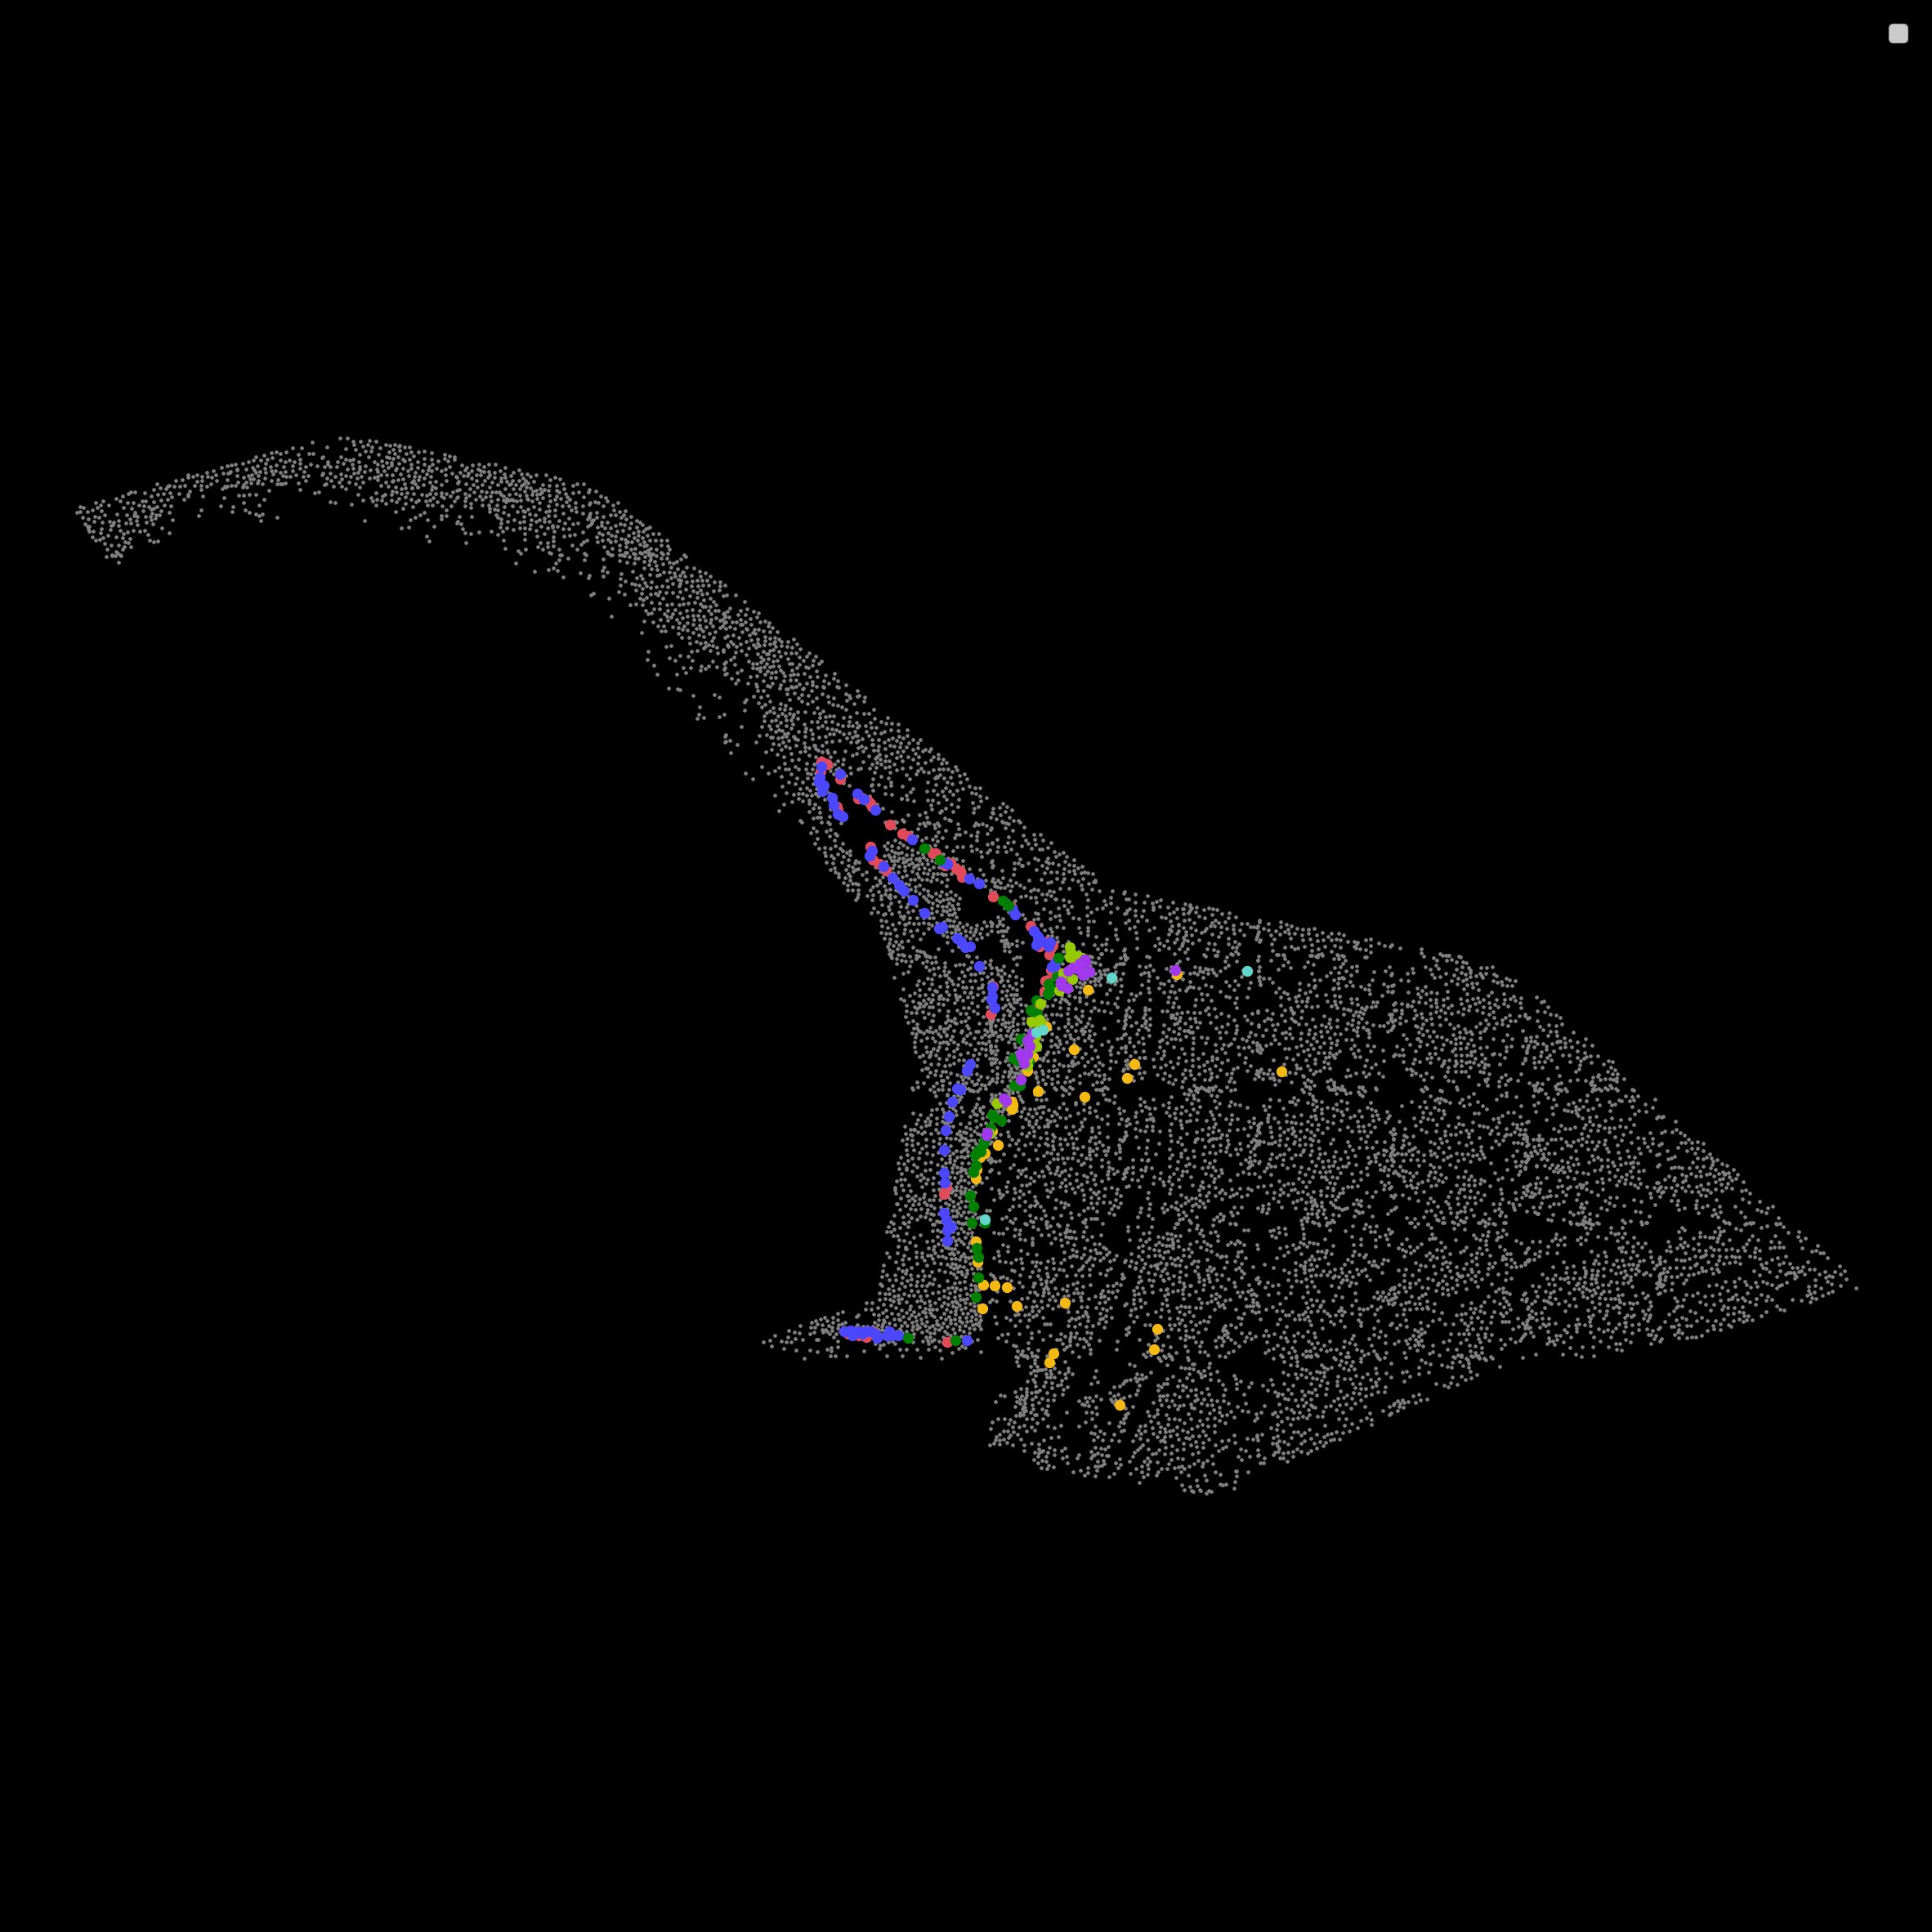

In [57]:
day3j.plot_cluster_scdata("neurogenesis_pathway", clusters=neu_groups, ref=day3, sbig=100)

In [58]:
# ingest subset svz pathway to svz umap
d = day3j.get_cluster(neu_groups, group="neurogenesis_pathway").copy()

vars1 = list(d.var.index)
vars2 = list(refumap.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = refumap[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='leiden')

day3ing = d.copy()

Genes in common: 278
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


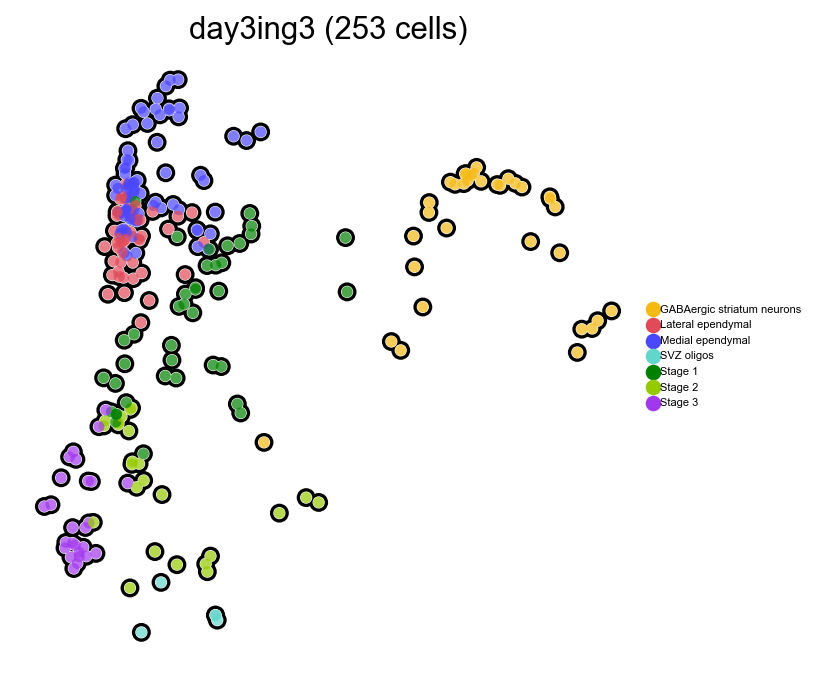

In [59]:
day3ingj = Jenie(day3ing, "day3ing3", "day3ing3", "neurogenesis_pathway")
day3ingj.umap("neurogenesis_pathway", fig=(5,5), size=100, legend="right margin")

### Figure I

Brain projection, umap, and paga analysis of SVZ pathway in 1 year old 1 week post injection

In [62]:
week1 = sc.read("../Data/new_paths/timepoints/adatasvz_neuro_noastro_ptb_injected_1week.h5ad")

d = week1

vars1 = list(d.var.index)
vars2 = list(ref.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = ref[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='neurogenesis_pathway')

week1j = Jenie(d, "week1ingested", "week1ingested", "neurogenesis_pathway")

Genes in common: 278
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


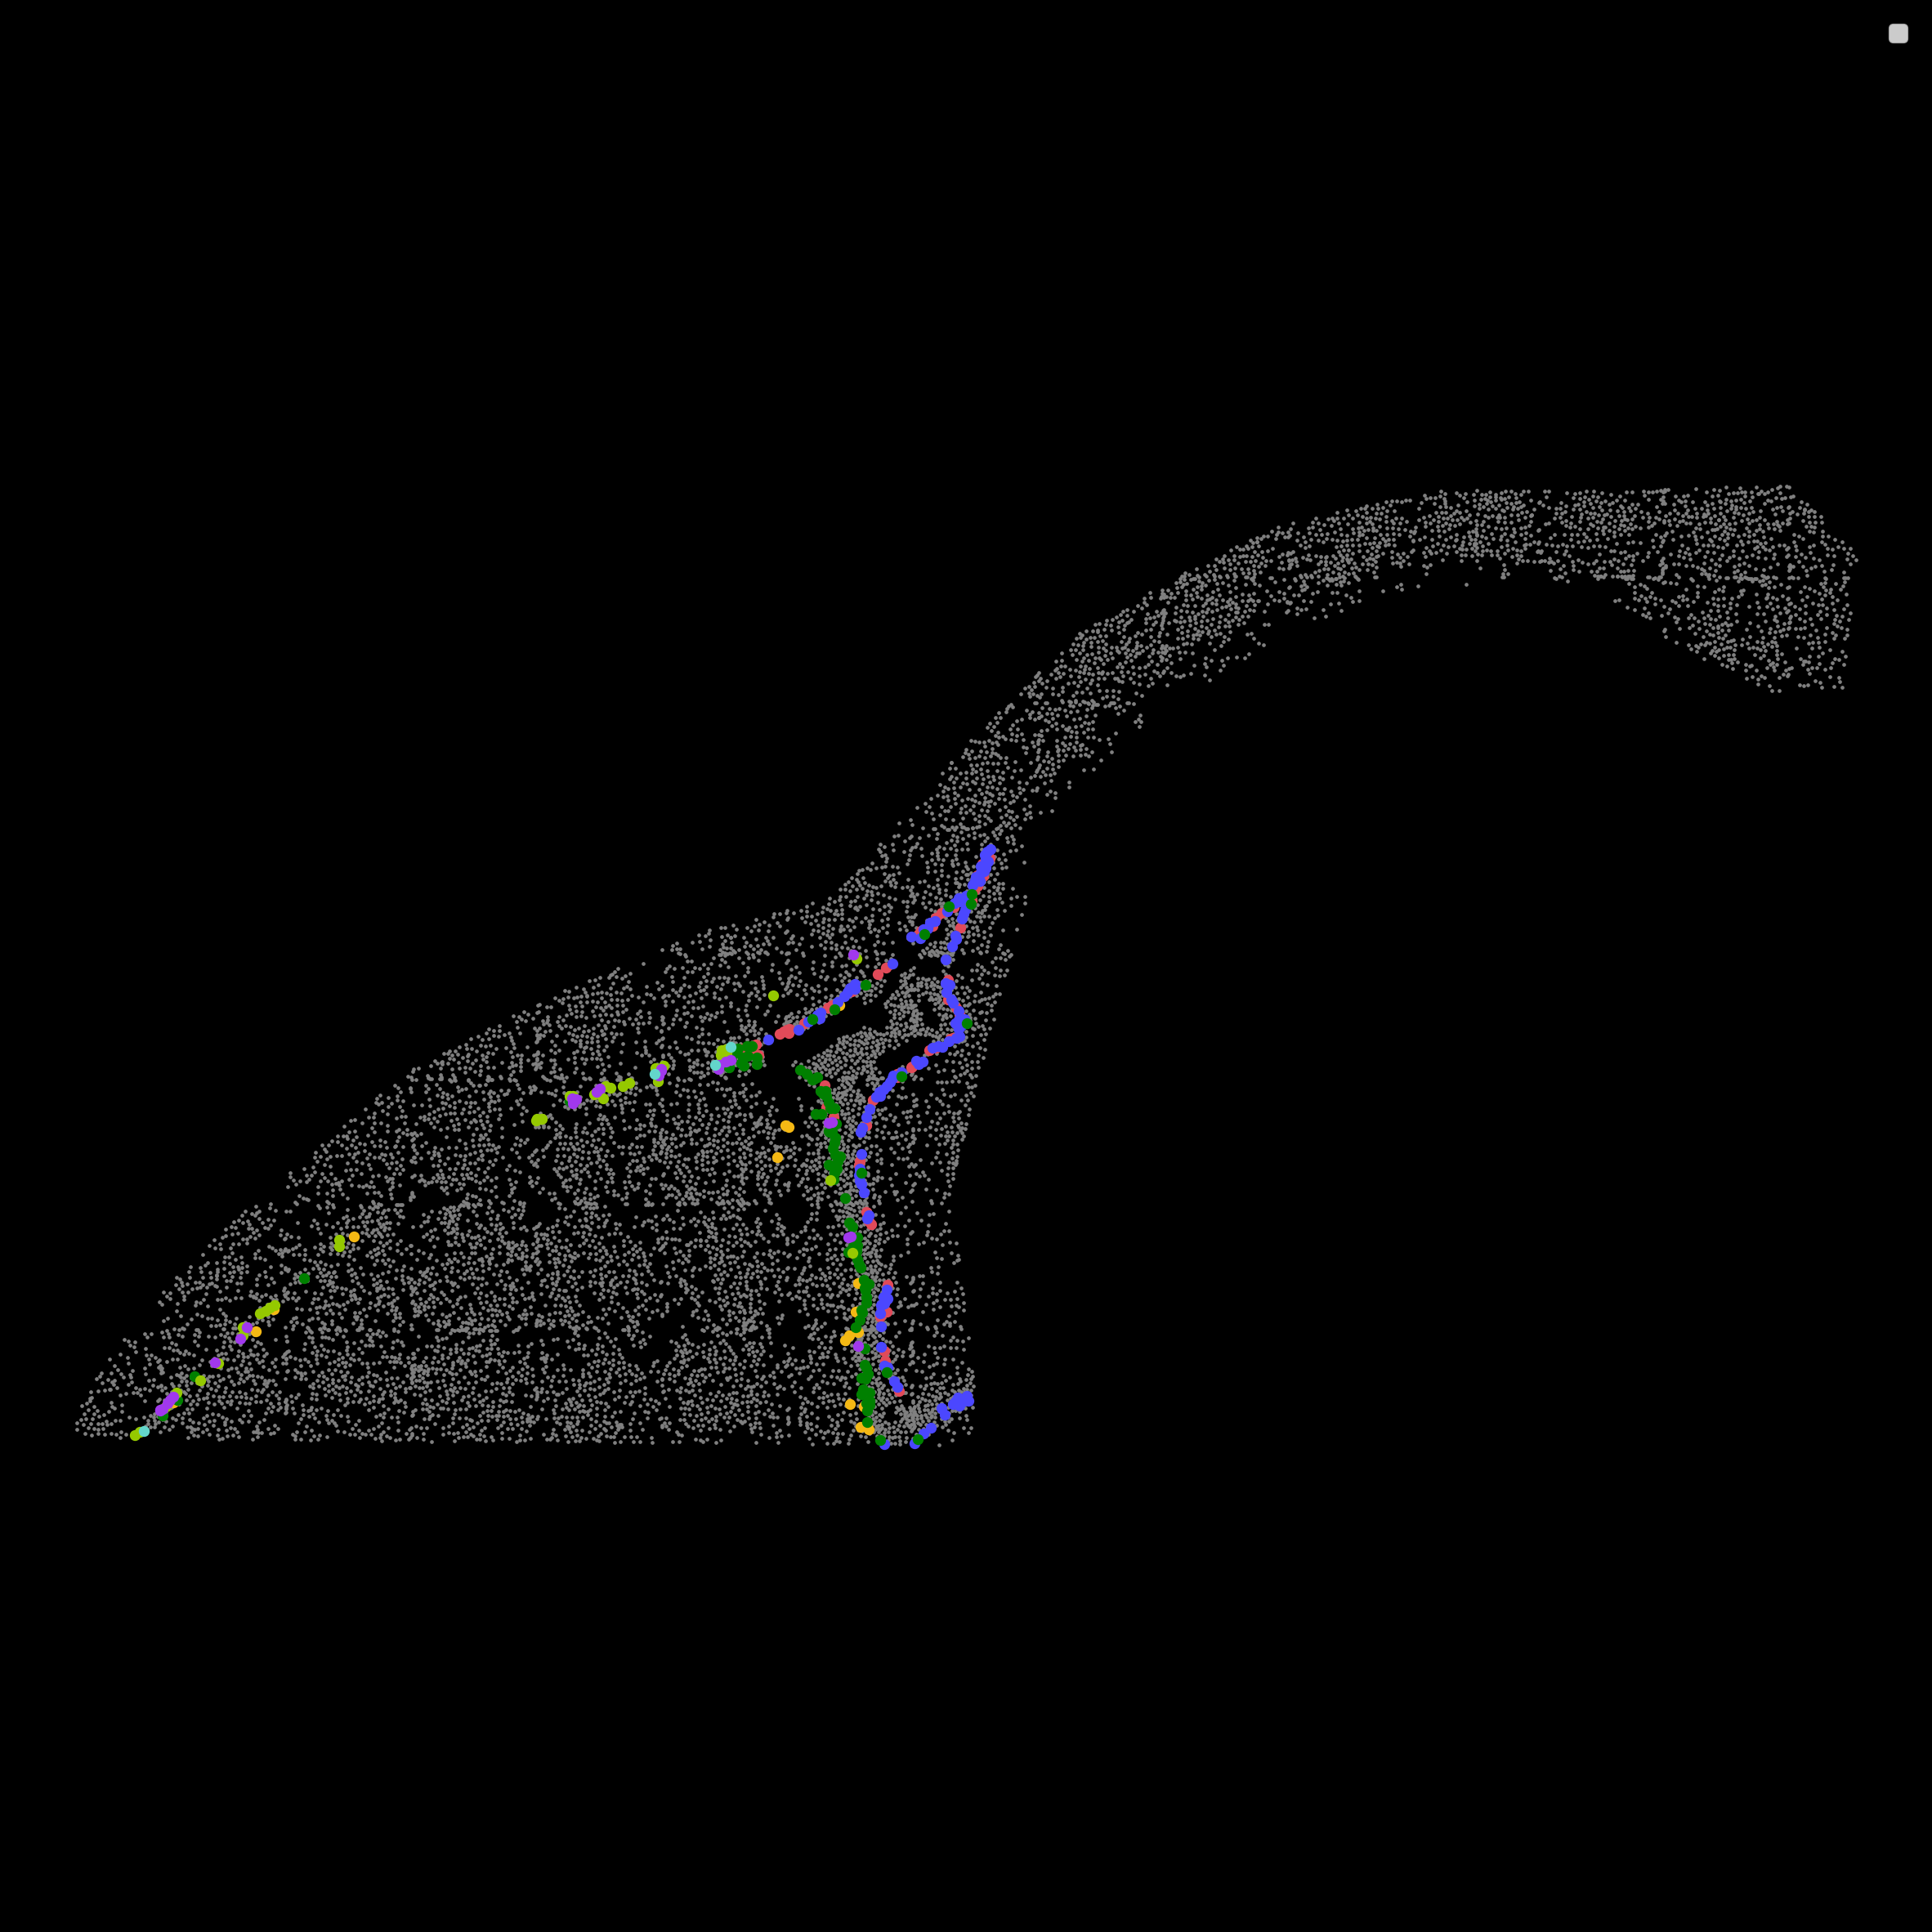

In [63]:
week1j.plot_cluster_scdata("neurogenesis_pathway", clusters=neu_groups, ref=week1, sbig=100)

In [64]:
# ingest subset svz pathway to svz umap
d = week1j.get_cluster(neu_groups, group="neurogenesis_pathway").copy()

vars1 = list(d.var.index)
vars2 = list(refumap.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = refumap[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='leiden')

week1ing = d.copy()

Genes in common: 278
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


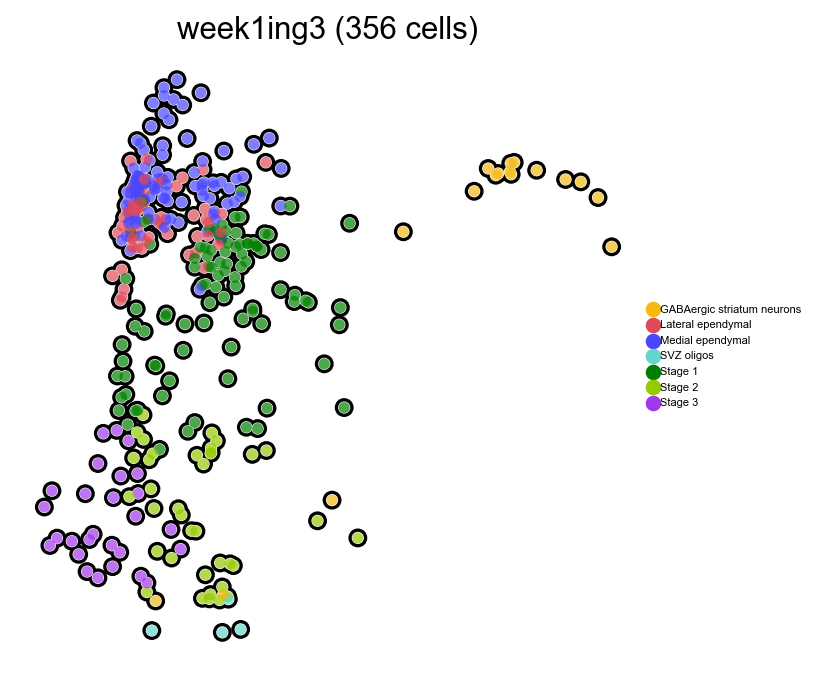

In [65]:
week1ingj = Jenie(week1ing, "week1ing3", "week1ing3", "neurogenesis_pathway")
week1ingj.umap("neurogenesis_pathway", fig=(5,5), size=100, legend="right margin")

In [63]:
subweek1 = week1j.data[week1j.data.obs["neurogenesis_pathway"].isin(neu_groups)]
subweek1j = Jenie(subweek1, "subweek1", "subweek1", "neurogenesis_pathway")


/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


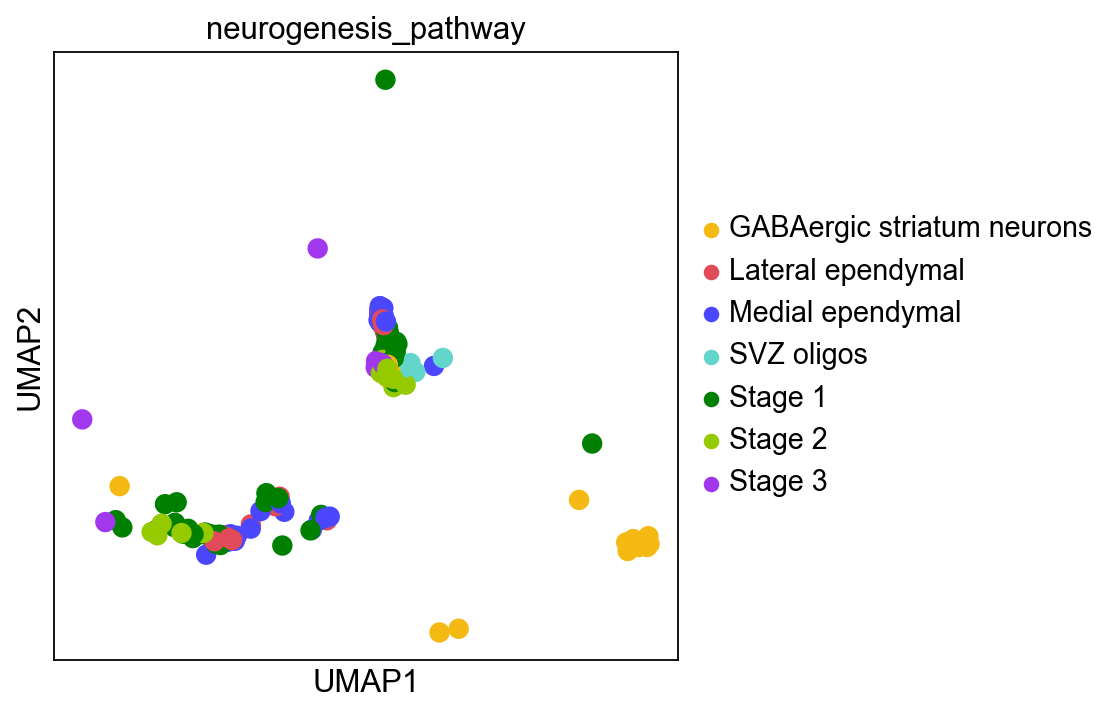

In [64]:
sc.pl.umap(subweek1j.data, color="neurogenesis_pathway", palette=Jenie.get_pallete("neurogenesis_pathway"))

/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/tools/_paga.py:122: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['paga'] = {}
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/neighbors/__init__.py:924: RuntimeWarning: divide by zero encountered in divide
  Q = scipy.sparse.spdiags(1.0 / q, 0, W.shape[0], W.shape[0])
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/neighbors/__init__.py:934: RuntimeWarning: divide by zero encountered in divide
  self.Z = scipy.sparse.spdiags(1.0 / z, 0, K.shape[0], K.shape[0])
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/_utils/__init__.py:434: RuntimeWarning: invalid value encountered in subtract
  ret[n:] = ret[n:] - ret[:-n]
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plo

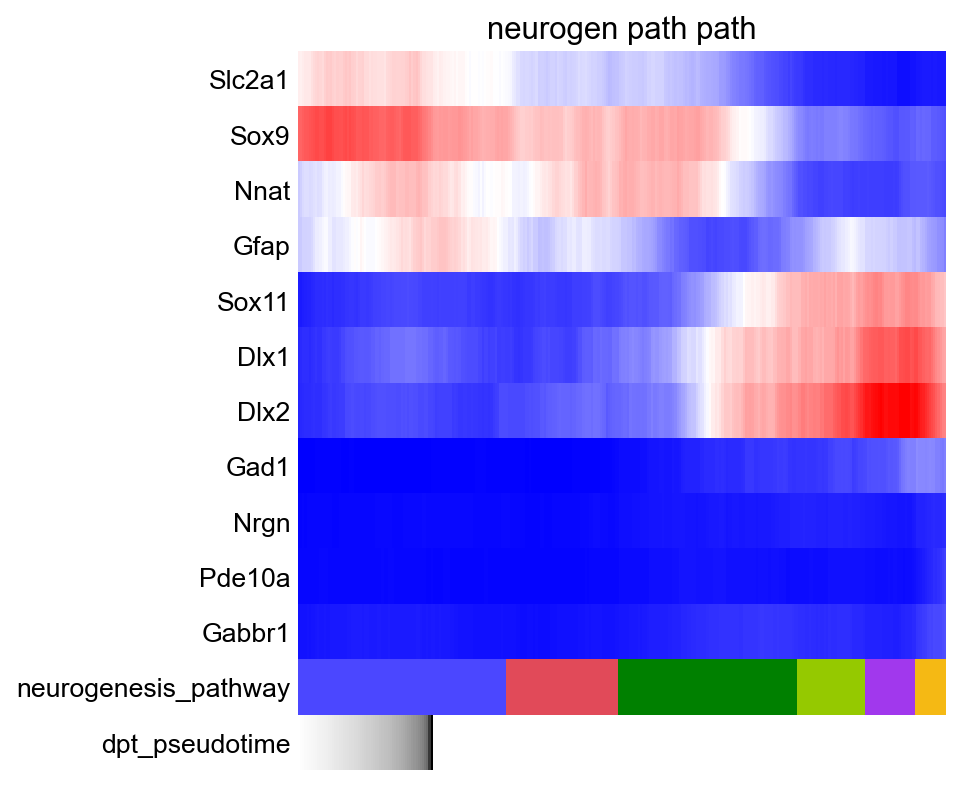

In [67]:
#TODO: paga

#TODO: paga day3

# paga analysis
#TODO
minmaxgenes = {
    'Slc2a1': [0, 78],
    'Sox9': [0, 55],
    'Nnat': [0, 112],
    'Gfap': [0, 129],
    'Sox11': [0, 11],
    'Dlx1': [0, 5],
    'Dlx2': [0, 12],
    'Gad1': [0, 24],
    'Nrgn': [0, 45],
    'Pde10a': [0, 222],
    'Gabbr1': [0, 73]
 }

gene_names = list(minmaxgenes.keys())

     

d = subweek1j.data.copy()



in_path = np.in1d(d.obs[group],path)
locs = [d.var.index.get_loc(gene) for gene in gene_names]
#Ns = np.sum(d.obsm["X_raw"][in_path],axis=-1)[:,np.newaxis]
#rawcellgenes = d.obsm["X_raw"][in_path][:,locs]/Ns*np.median(Ns)
#rawcellgenes = d.obsm["X_raw"][in_path][:,locs]
# vol = d.obsm['volume'][in_path]
rawcellgenes = d.obsm["X_raw"][in_path][:,:]
# rawcellgenes = rawcellgenes/vol*np.median(vol) ### norm by volume
# Ns = np.sum(rawcellgenes,axis=-1)[:,np.newaxis]
#rawcellgenes = rawcellgenes/Ns*np.median(Ns) ### norm by total counts
rawcellgenes = rawcellgenes[:,locs]

normcellgenes = d.obsm["X_raw"][in_path][:,locs]


for ign in range(rawcellgenes.shape[1]):
    gn = gene_names[ign]
    min_,max_ = minmaxgenes[gn]
    normcellgenes[:,ign] = np.clip((rawcellgenes[:,ign] - min_)/(max_-min_),0,1)


d = d[in_path]
d = d[:, gene_names]

d.X = normcellgenes#np.exp(d.X)-1


descr = 'neurogen path'

sc.tl.paga(d, groups=group)
sc.tl.diffmap(d)
d.uns['iroot'] = np.flatnonzero(d.obs[group]  == "Medial ependymal")[1] ###############starting points
sc.tl.dpt(d)

_, data = sc.pl.paga_path(
        d, path, gene_names,
        show_node_names=False,
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        # annotations=['pseudotime'],
        show_yticks=True,
        show_colorbar=False,
        color_map='bwr',
        groups_key=group,
        color_maps_annotations={'pseudotime': 'viridis'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)

### Figure J

Brain projection, umap, and paga analysis of SVZ pathway in 1 year old 1 month old post injection

In [66]:
month1 = sc.read("../Data/new_paths/timepoints/adatasvz_neuro_noastro_ptb_injected_1month.h5ad")

d = month1

vars1 = list(d.var.index)
vars2 = list(ref.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = ref[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='neurogenesis_pathway')

month1j = Jenie(d, "month1ingested", "month1ingested", "neurogenesis_pathway")

Genes in common: 278
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


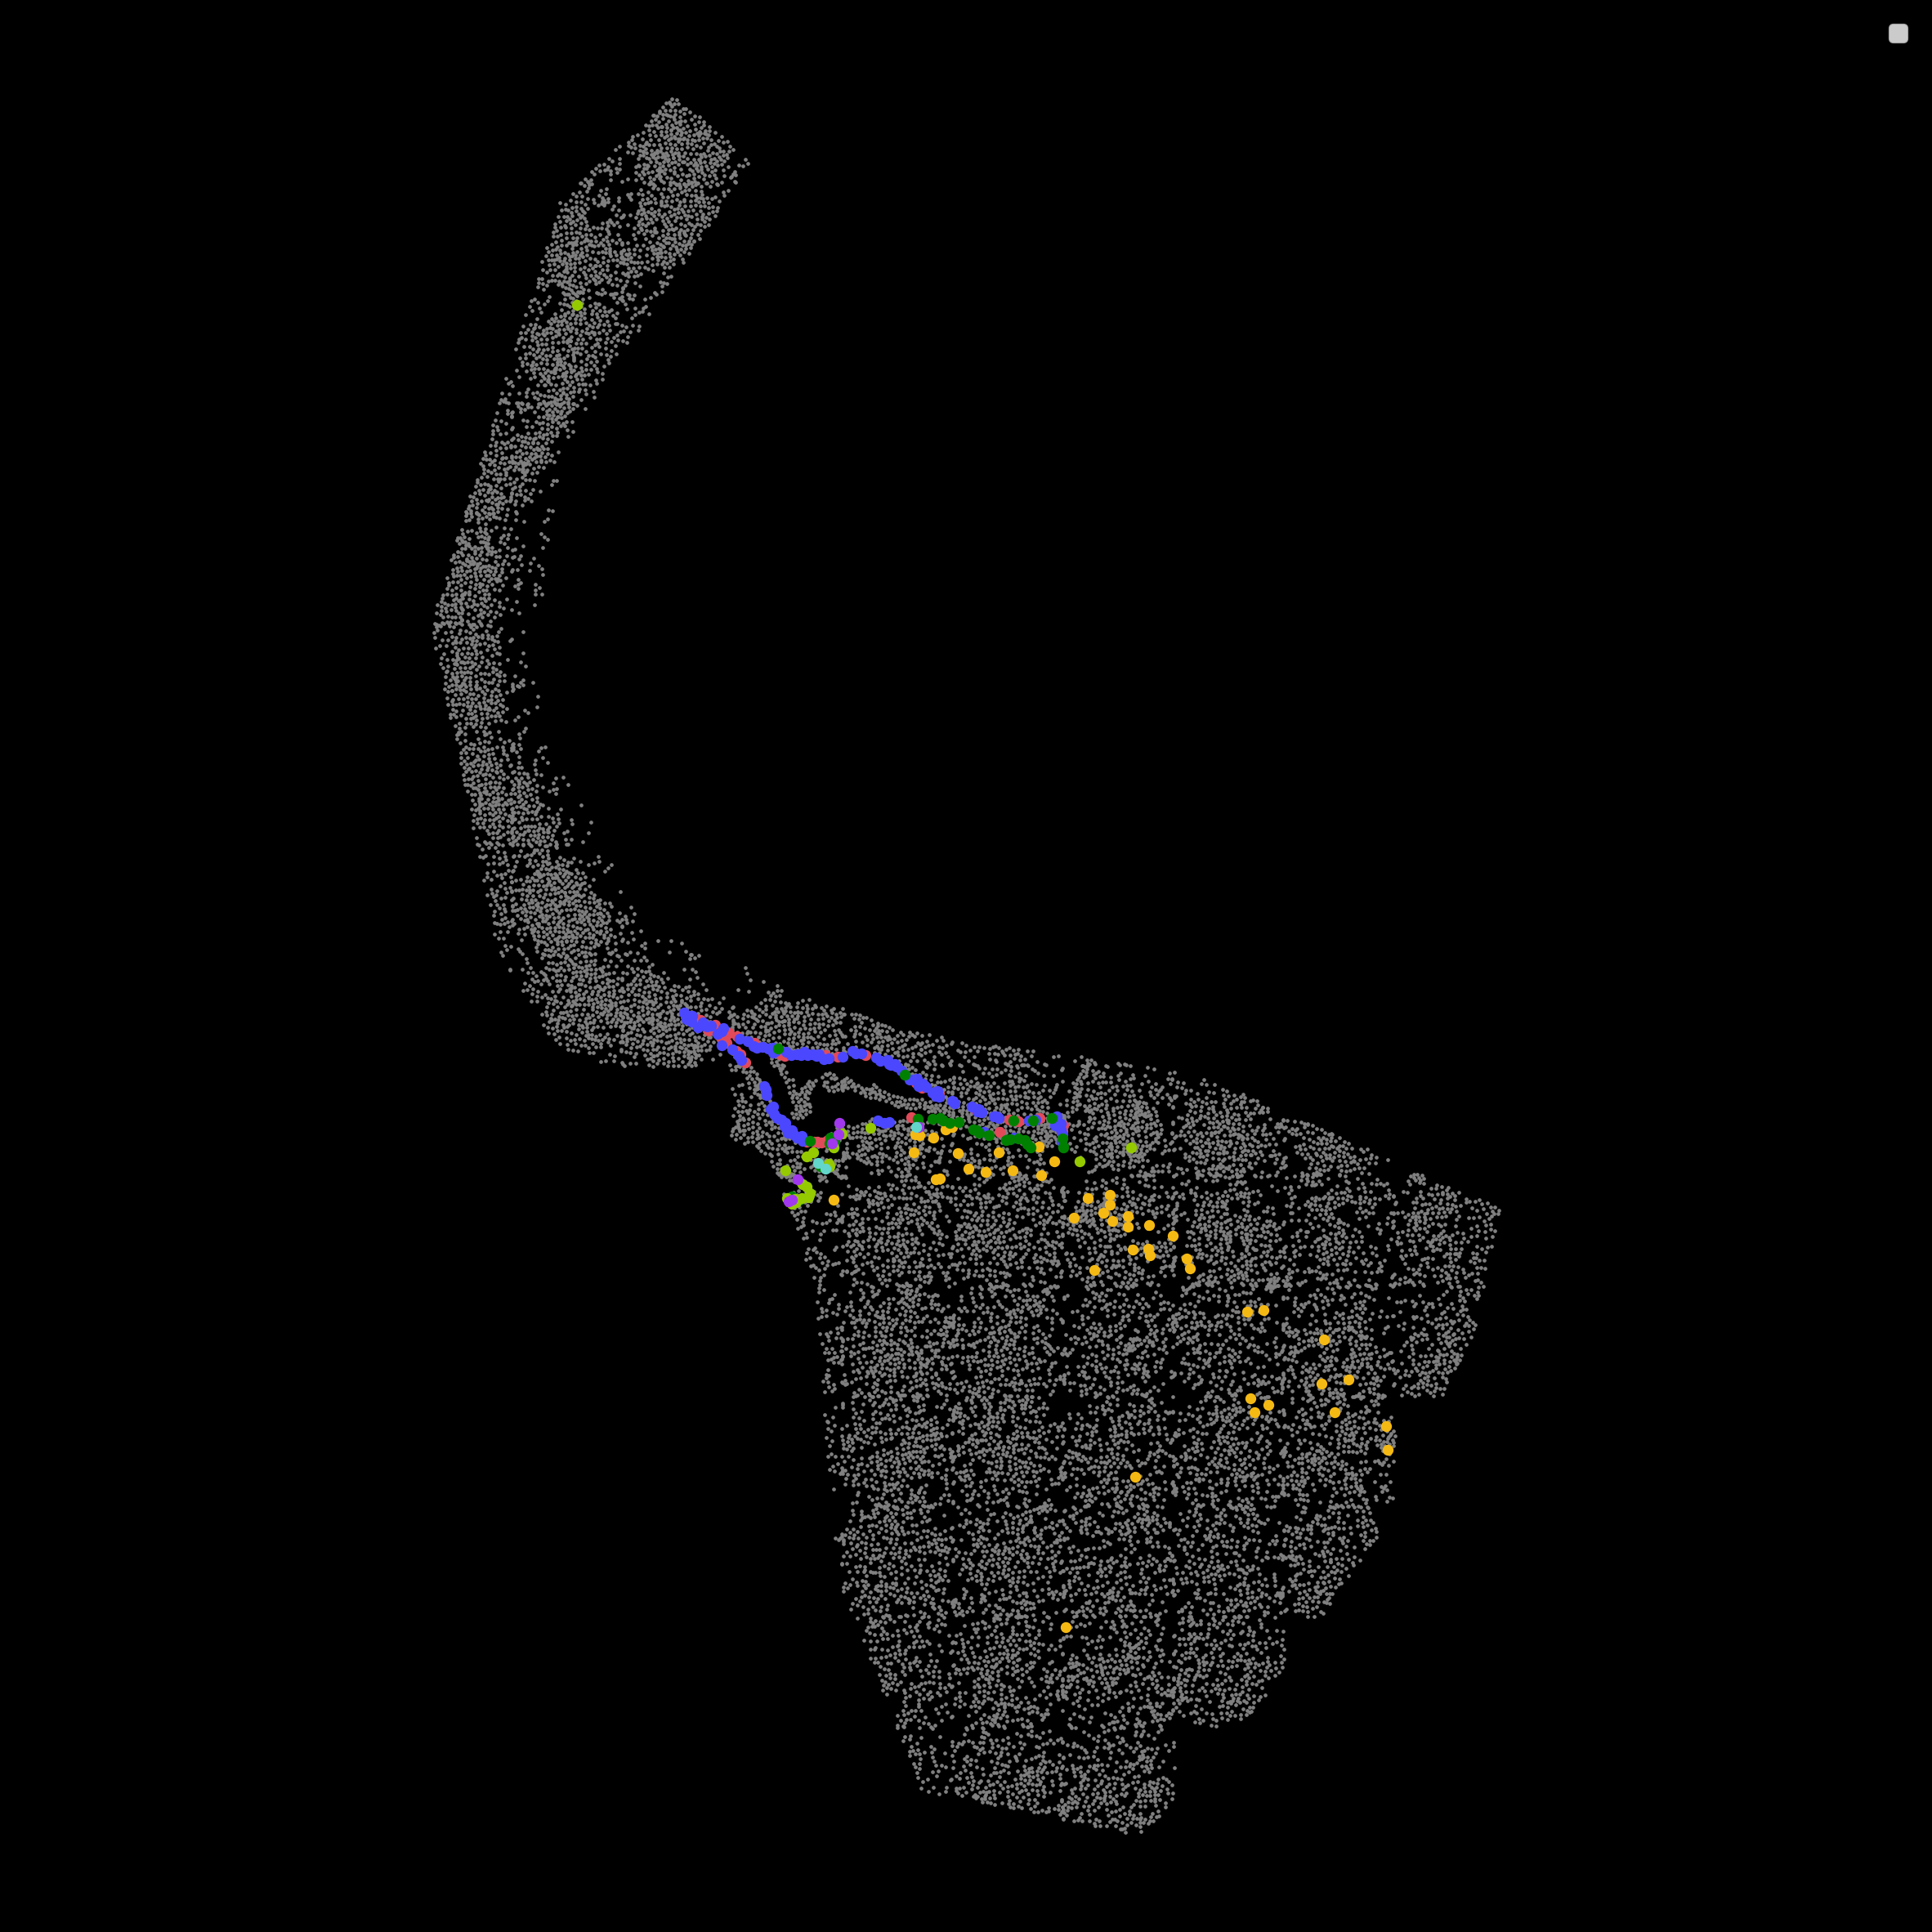

In [68]:
month1j.plot_cluster_scdata("neurogenesis_pathway", clusters=neu_groups, ref=month1, sbig=100)

In [69]:
# ingest subset svz pathway to svz umap
d = month1j.get_cluster(neu_groups, group="neurogenesis_pathway").copy()

vars1 = list(d.var.index)
vars2 = list(refumap.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = refumap[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='leiden')

month1ing = d.copy()

Genes in common: 278
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


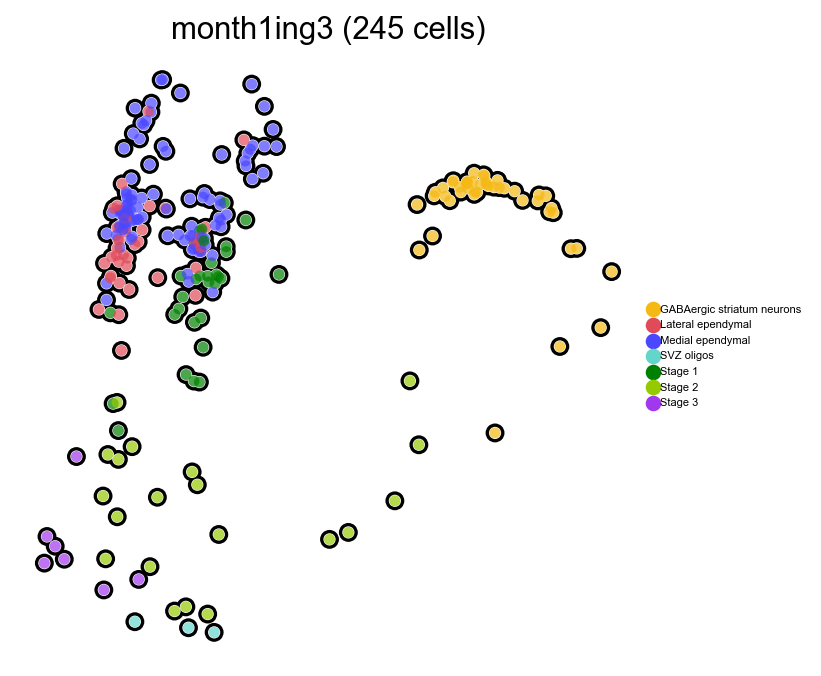

In [70]:
month1ingj = Jenie(month1ing, "month1ing3", "month1ing3", "neurogenesis_pathway")
month1ingj.umap("neurogenesis_pathway", fig=(5,5), size=100, legend="right margin")

/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


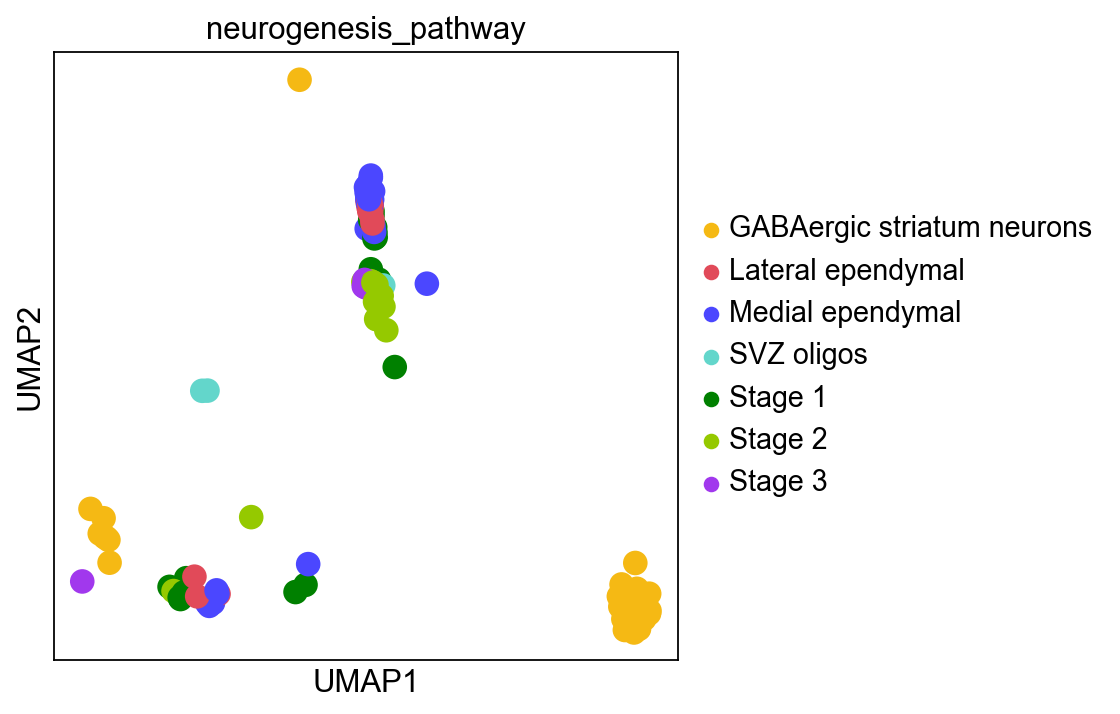

In [68]:
submonth1 = month1j.data[month1j.data.obs["neurogenesis_pathway"].isin(neu_groups)]
submonth1j = Jenie(submonth1, "submonth1", "submonth1", "neurogenesis_pathway")
sc.pl.umap(submonth1j.data, color="neurogenesis_pathway", palette=Jenie.get_pallete("neurogenesis_pathway"))

/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/tools/_paga.py:122: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['paga'] = {}
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/neighbors/__init__.py:924: RuntimeWarning: divide by zero encountered in divide
  Q = scipy.sparse.spdiags(1.0 / q, 0, W.shape[0], W.shape[0])
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/neighbors/__init__.py:934: RuntimeWarning: divide by zero encountered in divide
  self.Z = scipy.sparse.spdiags(1.0 / z, 0, K.shape[0], K.shape[0])
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/_utils/__init__.py:434: RuntimeWarning: invalid value encountered in subtract
  ret[n:] = ret[n:] - ret[:-n]
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plo

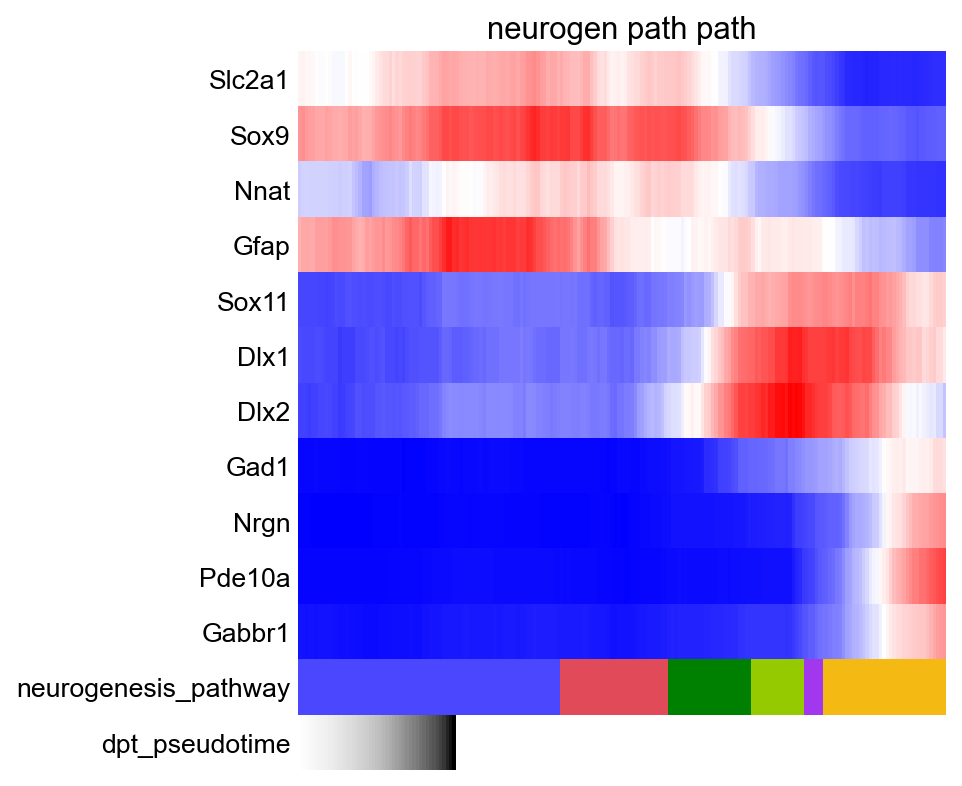

In [70]:
#TODO: paga

#TODO: paga day3

# paga analysis
#TODO
minmaxgenes = {
    'Slc2a1': [0, 78],
    'Sox9': [0, 55],
    'Nnat': [0, 112],
    'Gfap': [0, 129],
    'Sox11': [0, 11],
    'Dlx1': [0, 5],
    'Dlx2': [0, 12],
    'Gad1': [0, 24],
    'Nrgn': [0, 45],
    'Pde10a': [0, 222],
    'Gabbr1': [0, 73]
 }

gene_names = list(minmaxgenes.keys())

     

d = submonth1j.data.copy()



in_path = np.in1d(d.obs[group],path)
locs = [d.var.index.get_loc(gene) for gene in gene_names]
#Ns = np.sum(d.obsm["X_raw"][in_path],axis=-1)[:,np.newaxis]
#rawcellgenes = d.obsm["X_raw"][in_path][:,locs]/Ns*np.median(Ns)
#rawcellgenes = d.obsm["X_raw"][in_path][:,locs]
# vol = d.obsm['volume'][in_path]
rawcellgenes = d.obsm["X_raw"][in_path][:,:]
# rawcellgenes = rawcellgenes/vol*np.median(vol) ### norm by volume
# Ns = np.sum(rawcellgenes,axis=-1)[:,np.newaxis]
#rawcellgenes = rawcellgenes/Ns*np.median(Ns) ### norm by total counts
rawcellgenes = rawcellgenes[:,locs]

normcellgenes = d.obsm["X_raw"][in_path][:,locs]


for ign in range(rawcellgenes.shape[1]):
    gn = gene_names[ign]
    min_,max_ = minmaxgenes[gn]
    normcellgenes[:,ign] = np.clip((rawcellgenes[:,ign] - min_)/(max_-min_),0,1)


d = d[in_path]
d = d[:, gene_names]

d.X = normcellgenes#np.exp(d.X)-1


descr = 'neurogen path'

sc.tl.paga(d, groups=group)
sc.tl.diffmap(d)
d.uns['iroot'] = np.flatnonzero(d.obs[group]  == "Medial ependymal")[1] ###############starting points
sc.tl.dpt(d)

_, data = sc.pl.paga_path(
        d, path, gene_names,
        show_node_names=False,
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        # annotations=['pseudotime'],
        show_yticks=True,
        show_colorbar=False,
        color_map='bwr',
        groups_key=group,
        color_maps_annotations={'pseudotime': 'viridis'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)